In [1]:
folder_name = "/content/drive/My Drive/Irfan/Kuliah/Semester 5/Machine Learning/Pertemuan 03 - (15-10-24)/01_adult_classification/"

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import sys
sys.path.append(f'{folder_name}')

Mounted at /content/drive


## **Load Library**

# **Unit 1: Load Data (awal sampai baca dataset)**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# **Baca Dataset**

In [4]:
#Dataset bisa langsung dibaca dari link UT UCI Machine Learning
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"


#ini dibuat jika data tidak ada judul kolom
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                'marital_status', 'occupation', 'relationship', 'race', 'sex',
                'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df = pd.read_csv(url, names=column_names, skipinitialspace=True, na_values="?")


# bisa juga dari folder google drive
#df =pd.read_csv(f'{folder_name}/adult.data', sep=',',names=column_names, skipinitialspace=True, na_values="?")

#sep adalah pemisah antar kolom pada data, skipinitialspace adalah jika ada spasi setelah separator, na values adalah tanda pada data yang missing


# **Unit 2: Periksa Data (df info sampai stack barplot)**

In [5]:
# Tampilkan beberapa 5 baris pertama dan informasi dataset
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# **Baca Informasi Dataset terkait Missing Value**

In [7]:
#Hitung jumlah missing value per kolom
missing_values = df.isnull().sum()
print("\nJumlah Missing Value per Kolom:")
print(missing_values)


Jumlah Missing Value per Kolom:
age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


# **Menghitung Persentase Missing Value**

In [8]:
#Hitung persentase missing values
missing_percentage = (missing_values / len(df)) * 100
print("\nPersentase Missing Value per Kolom:")
print(missing_percentage)


Persentase Missing Value per Kolom:
age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education_num     0.000000
marital_status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.000000
native_country    1.790486
income            0.000000
dtype: float64


# **Statistik Deskriptif Variabel Numerik**

In [9]:
#khusus data numerik
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# **Statistik Deskriptif Variabel Kategorikal**

In [10]:
#khusus data kategorikal
df.describe(include=['object'])

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


# **Distribusi target Variabel**

In [11]:
df['income'].value_counts(normalize=True)

,proportion
income,
<=50K,0.75919
>50K,0.24081


Penjelasan:
Distribusi Kelas:

*  75,919% dari sampel pendapatan kecil sama 50k per tahun
*  24,081% dari sampel memiliki pendapatan besar 50k per tahun

Ketidakseimbangan kelas (Class Imbalance):

*   Dataset ini menunjutkkan ketidakseimbangan kelas yang cukup signifikan
*   Rasio antara kelas mayoritan dan kelas minoritas adalah sekitar 3:1


# **Variabel Numerik Menggunakan Histogram**

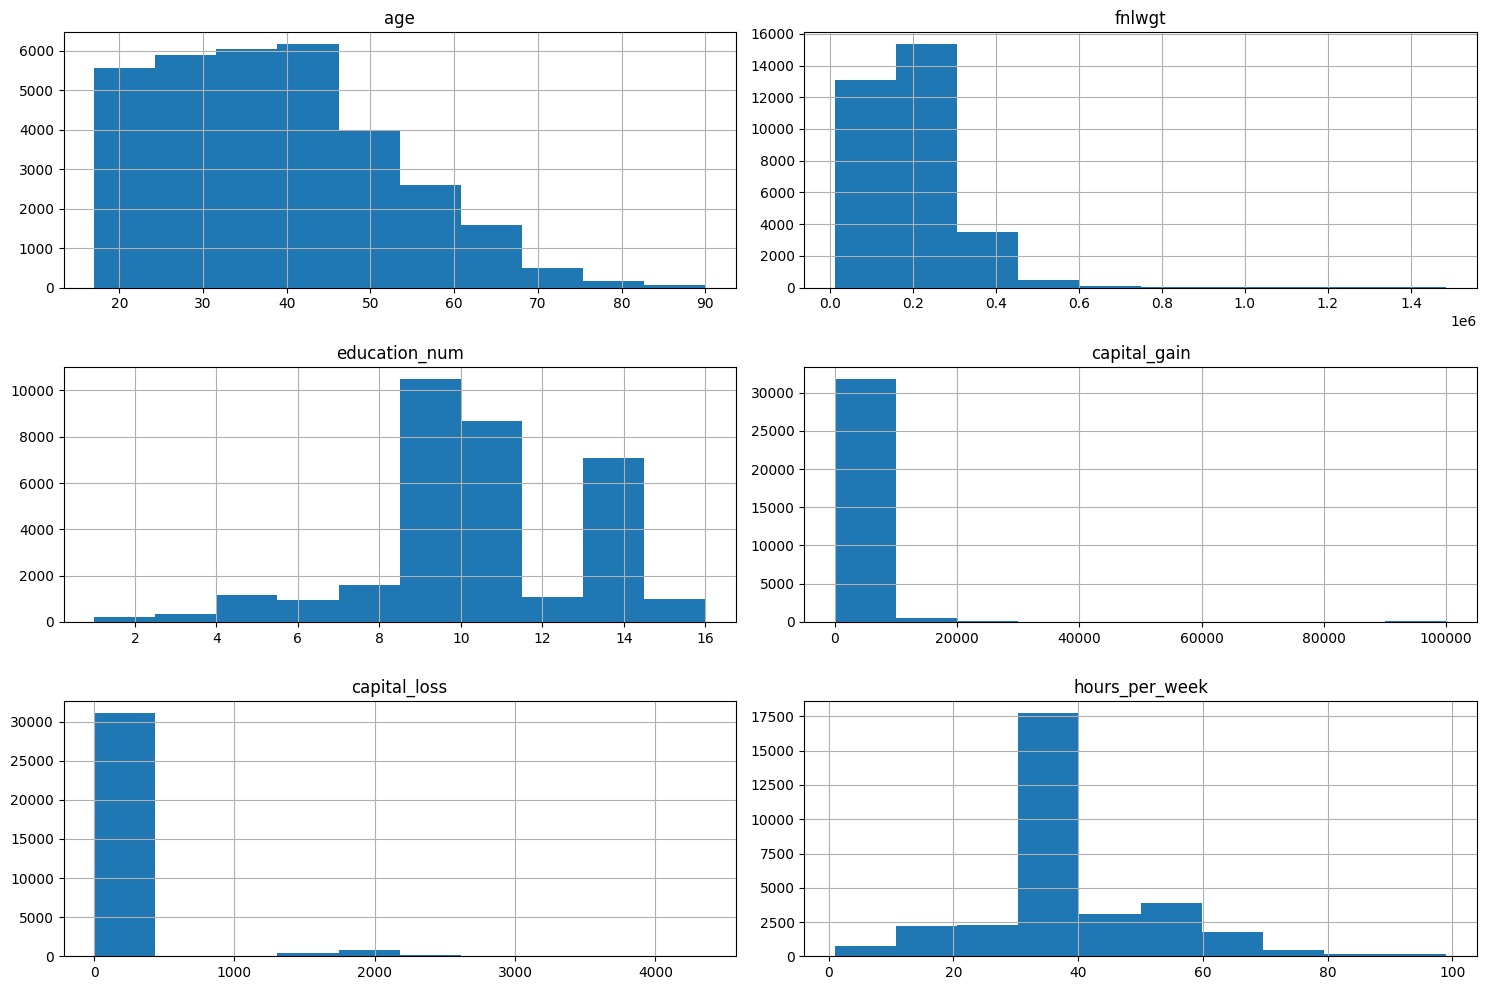

In [12]:
#Histogram untuk variabel numerik
numeric_features = df.select_dtypes(include=[np.number]).columns
df[numeric_features].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# **Variabel Kategorikal menggunakan Barplot**

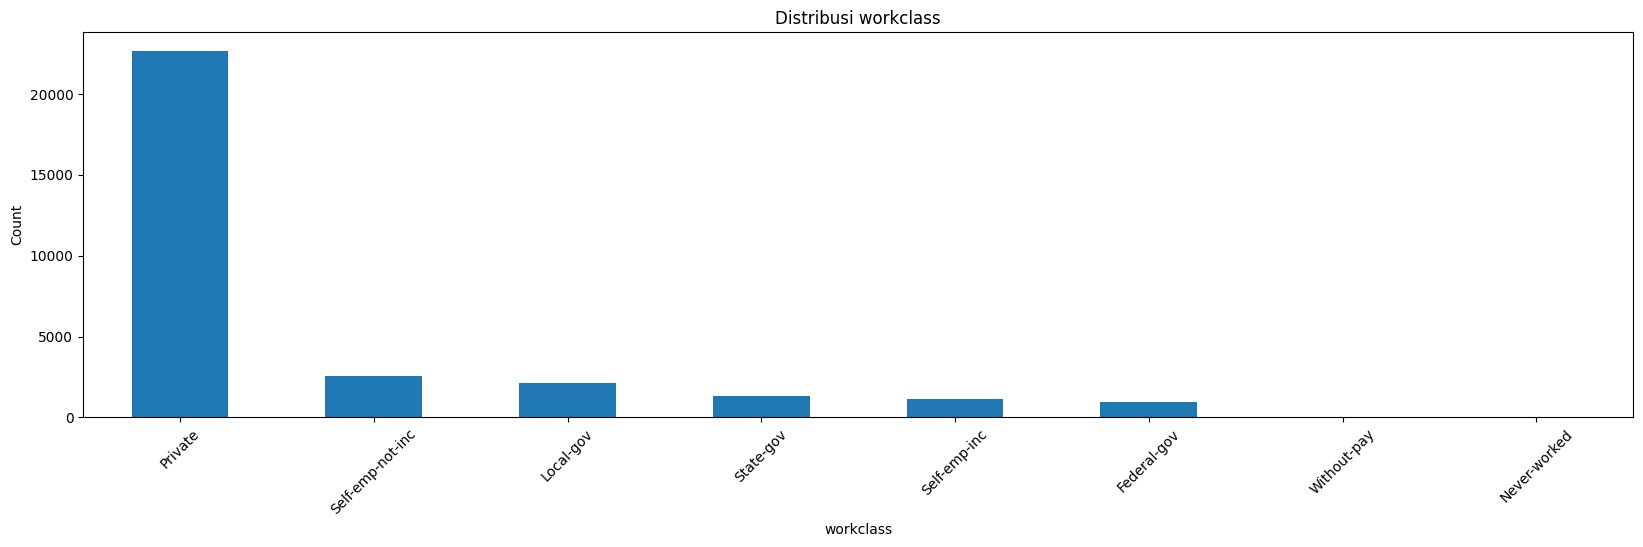

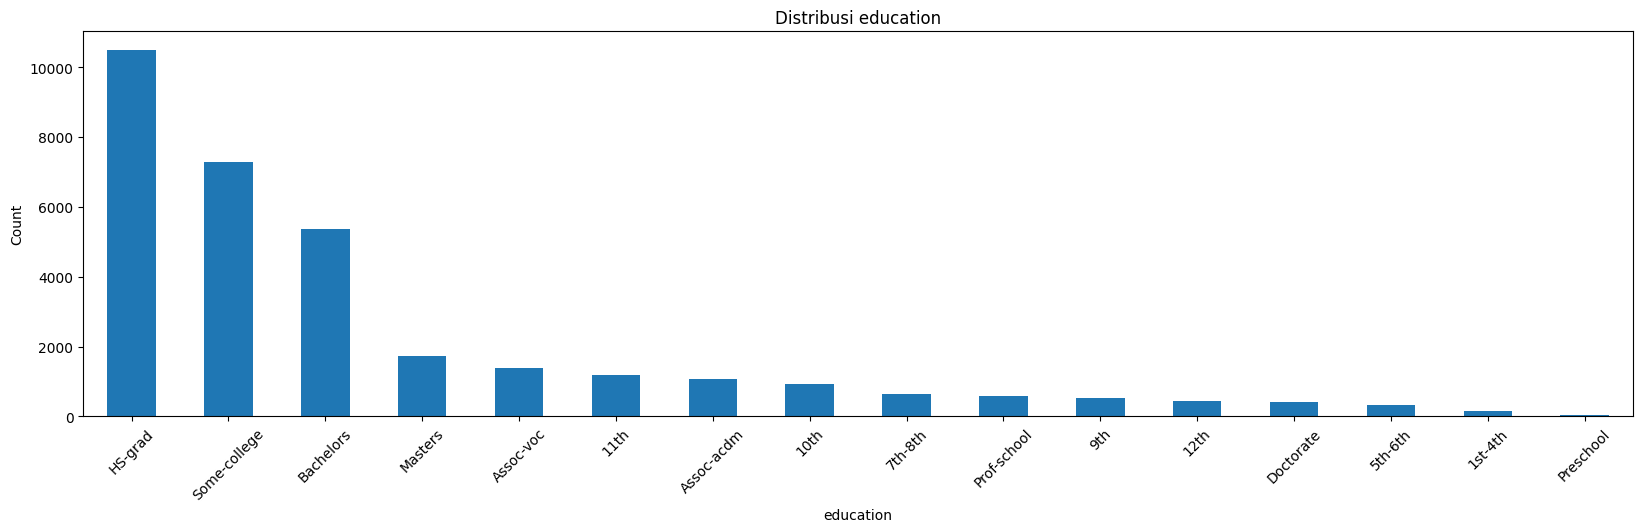

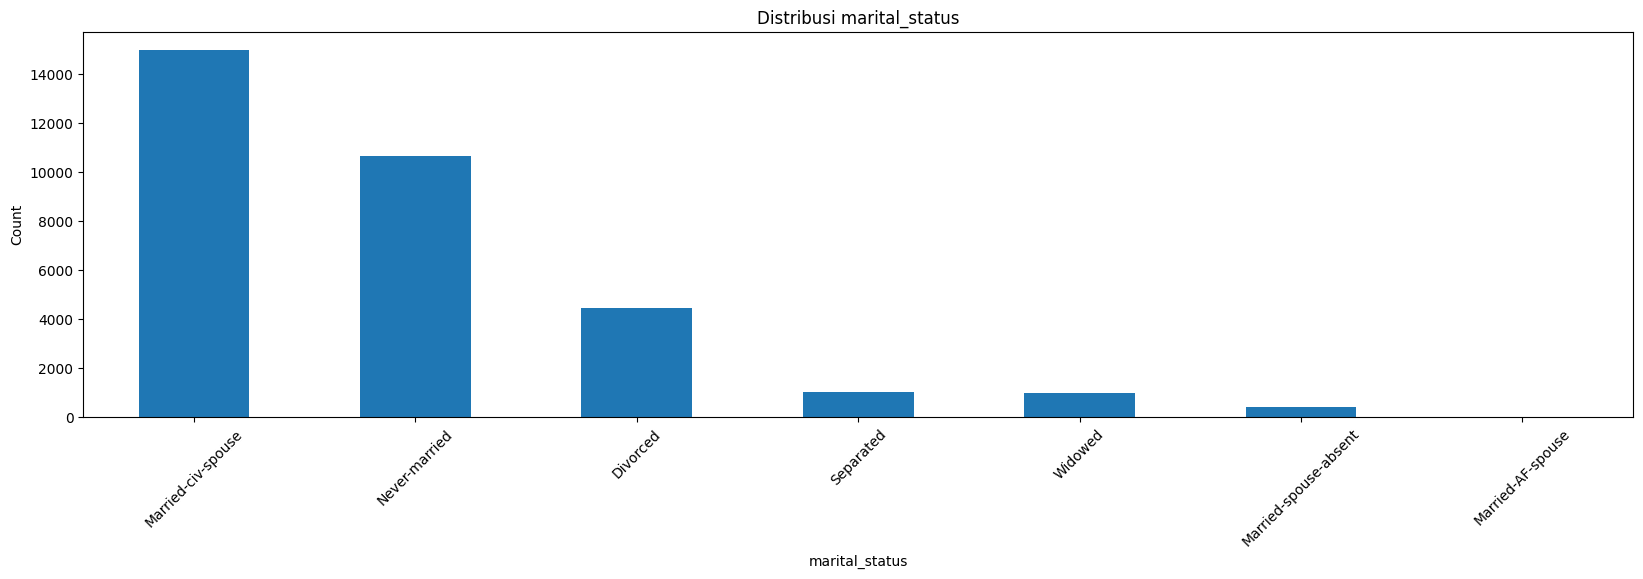

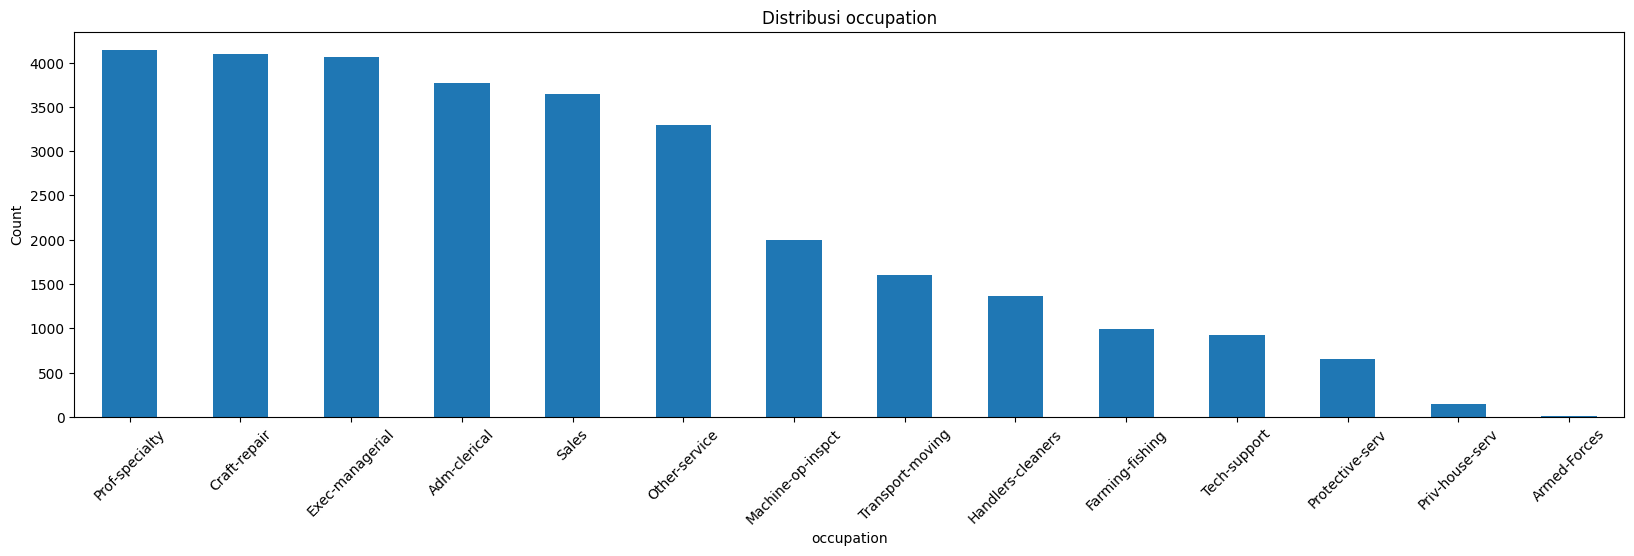

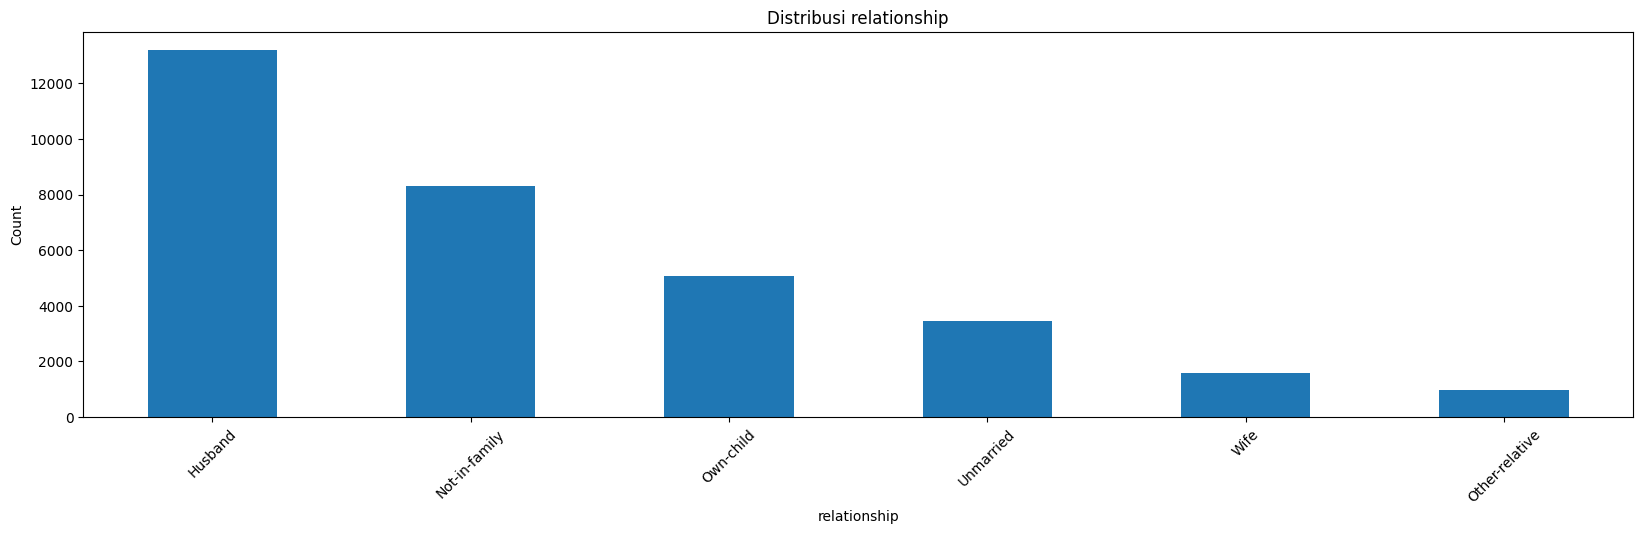

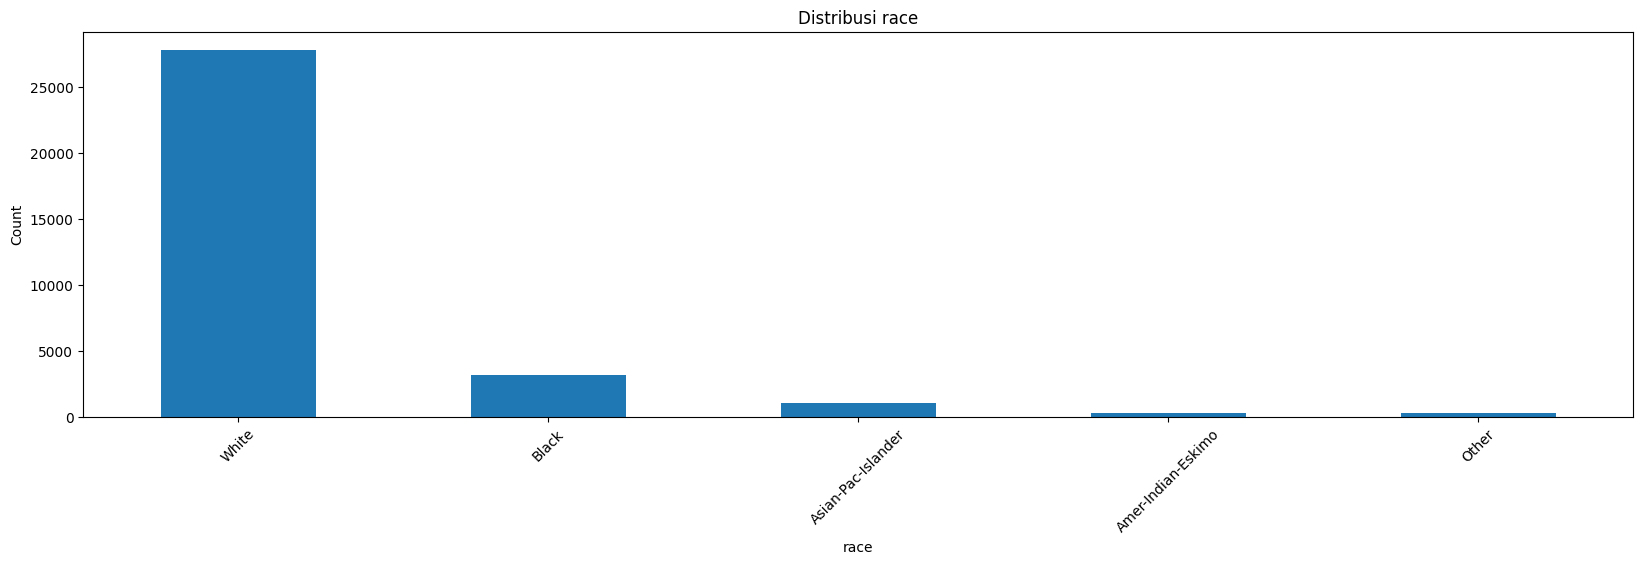

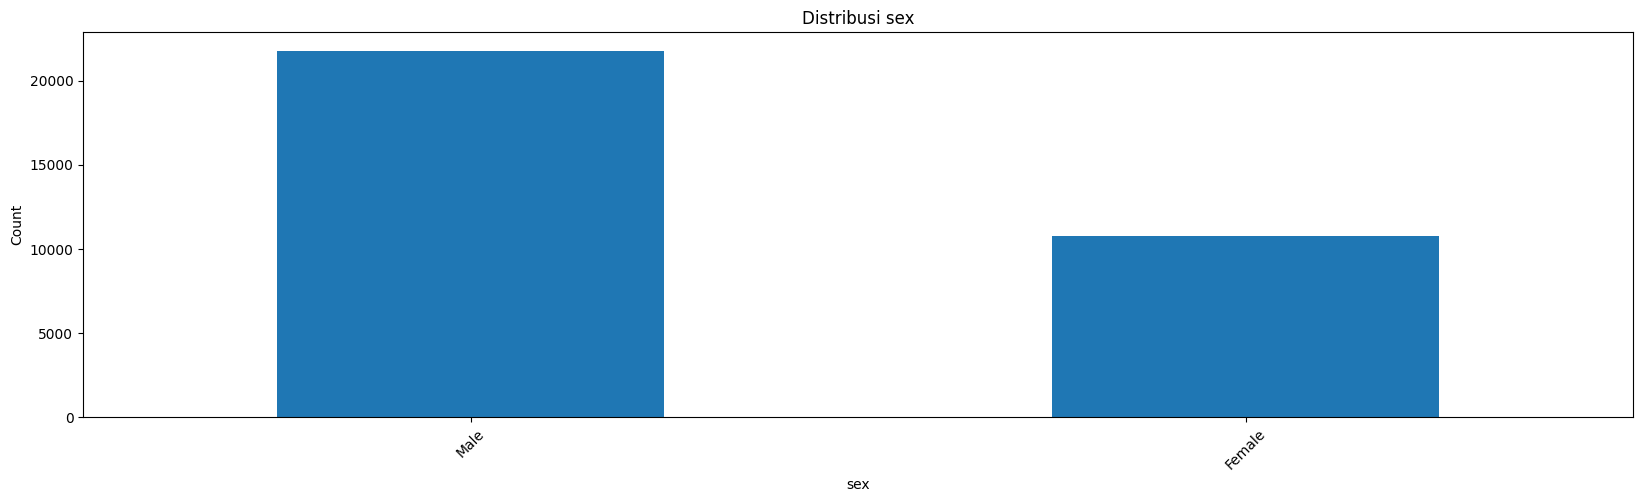

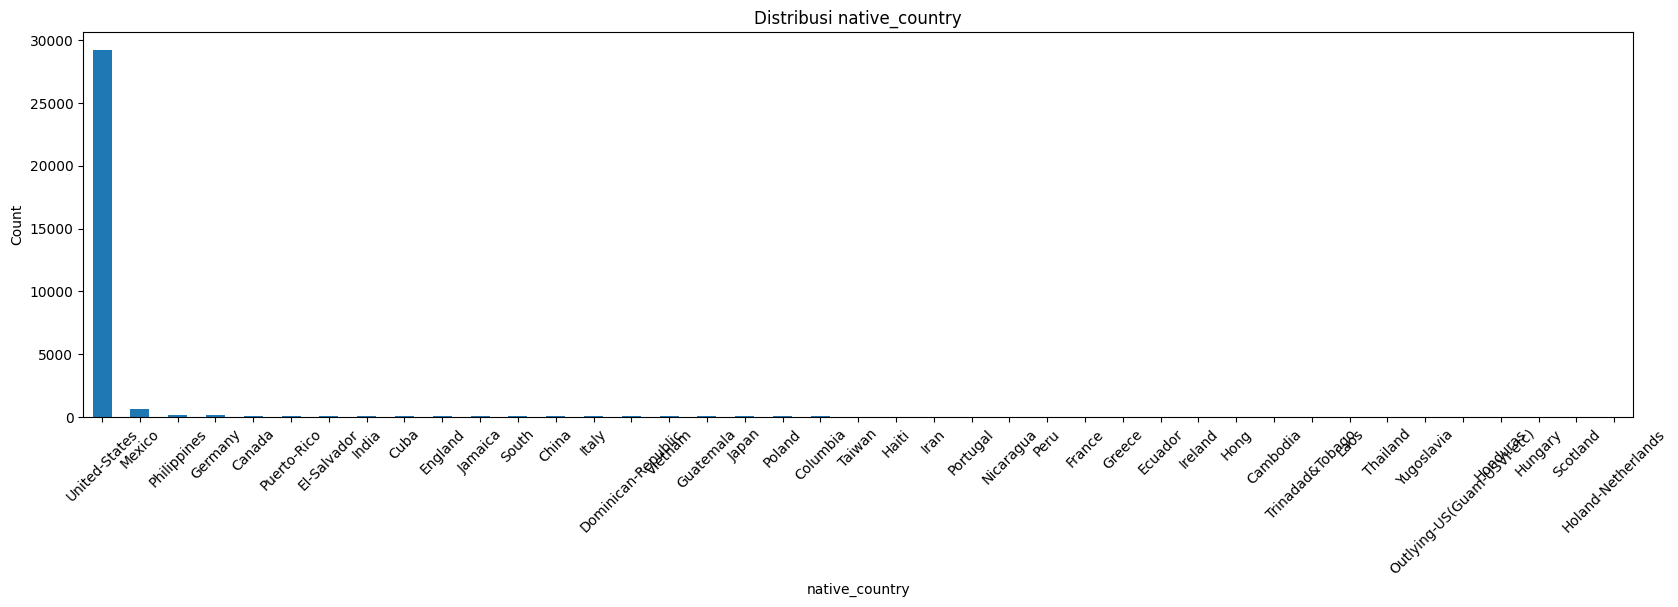

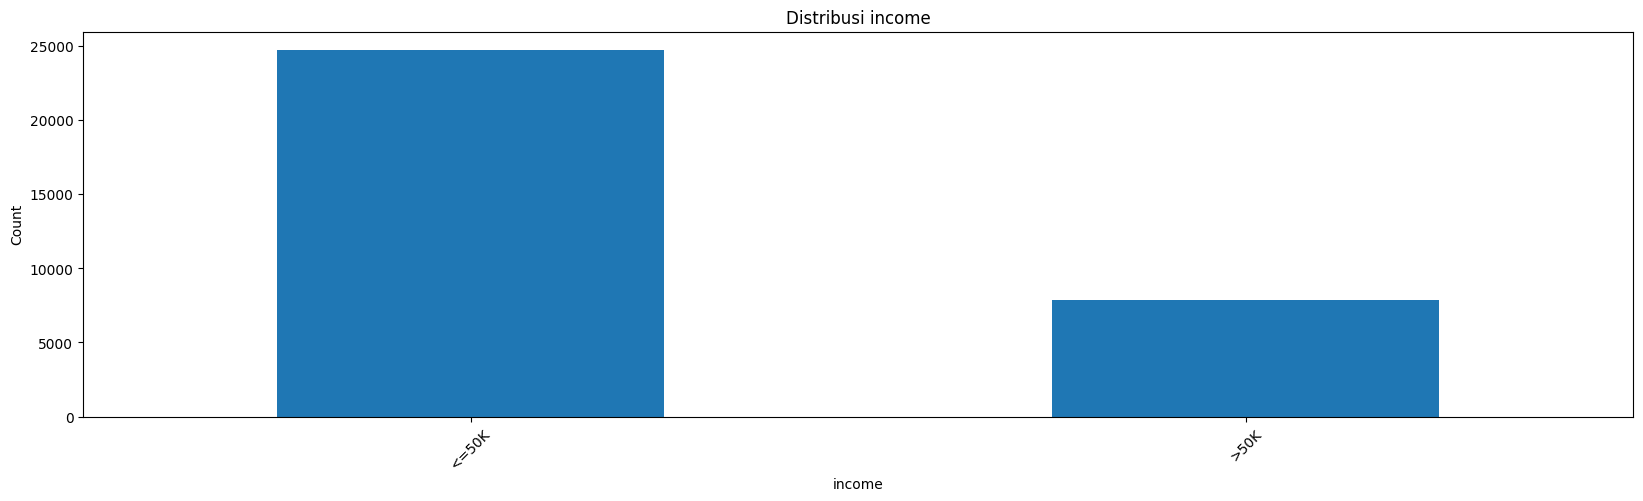

In [13]:
#Bar plot untuk variabel kategorikal
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(20, 5))
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'Distribusi {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show

# **Analisa Korelasi**

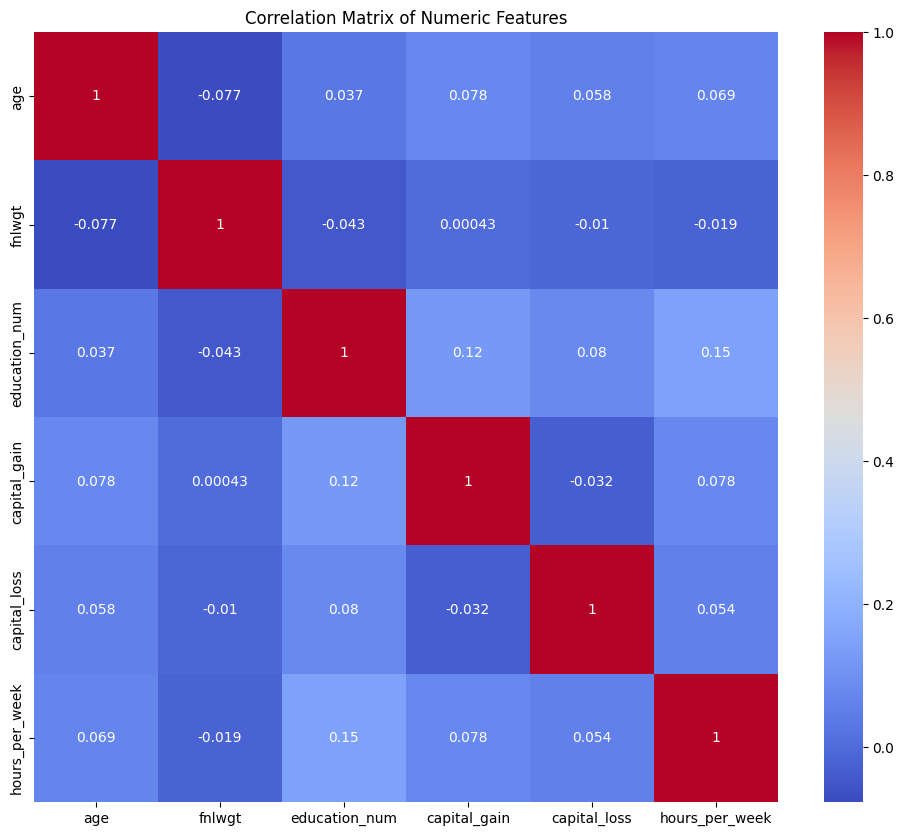

In [14]:
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# **Analisa Hubungan Dengan Variabel Target**

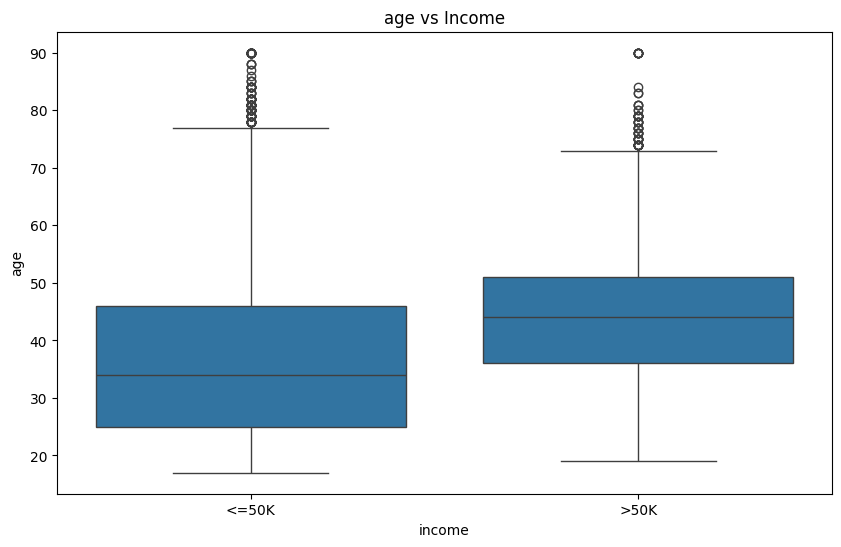

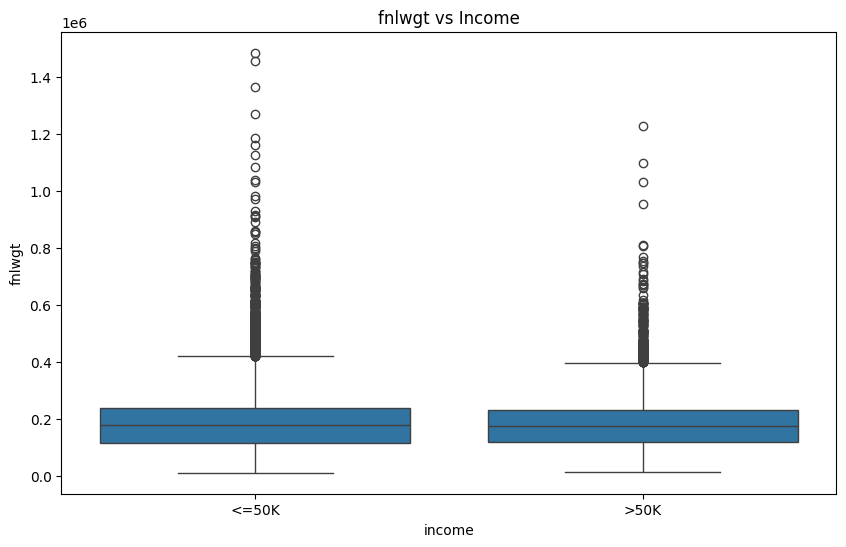

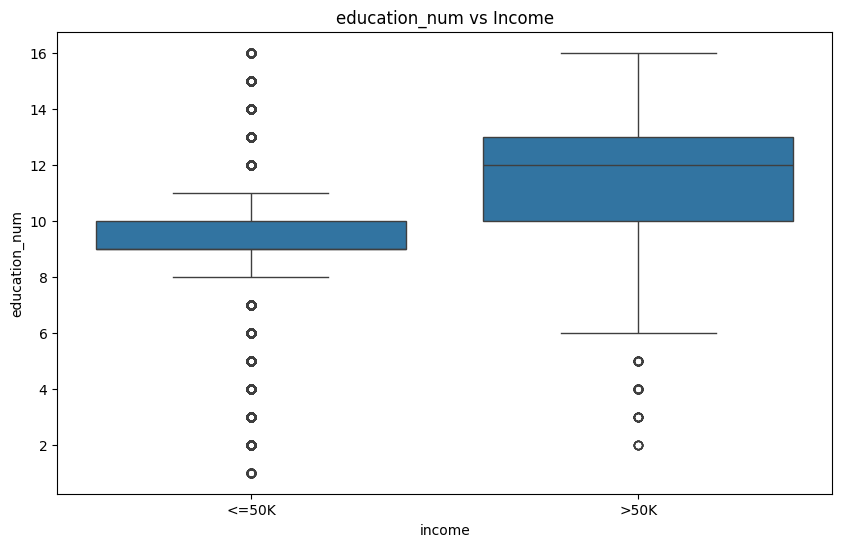

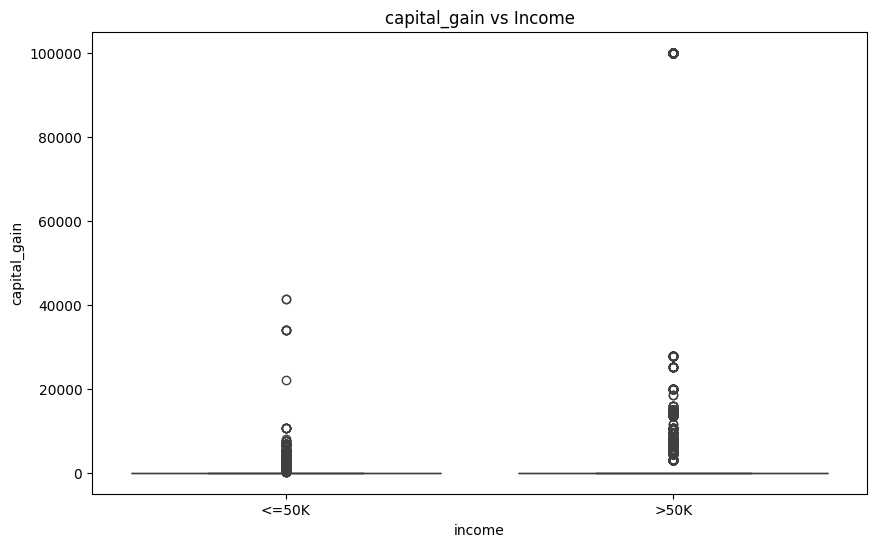

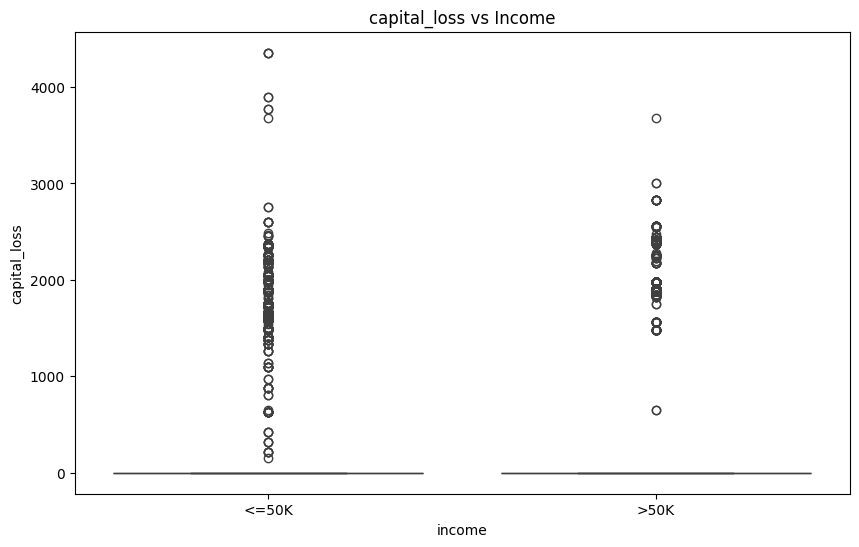

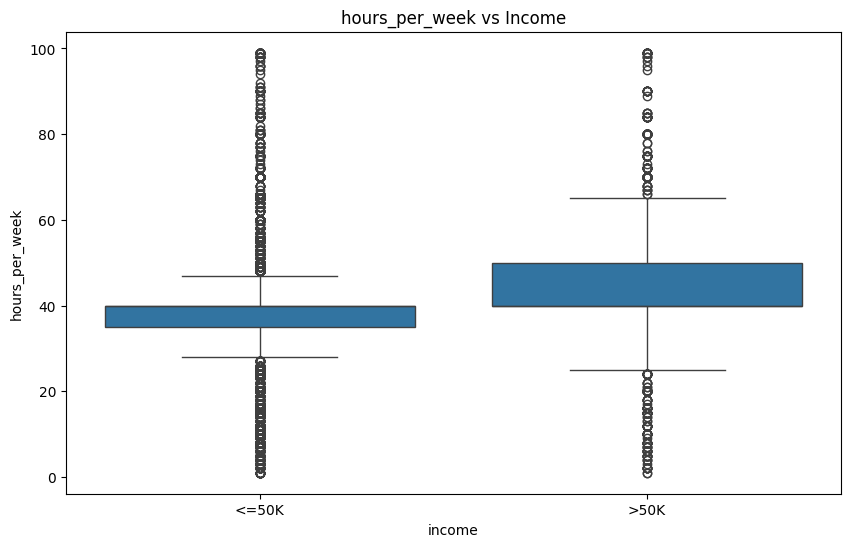

In [15]:
for feature in numeric_features:
  plt.figure(figsize=(10,6))
  sns.boxplot(x='income', y=feature, data=df)
  plt.title(f'{feature} vs Income')
  plt.show()

# **Stacked bar plot kategorikal vs target**

<Figure size 1200x600 with 0 Axes>

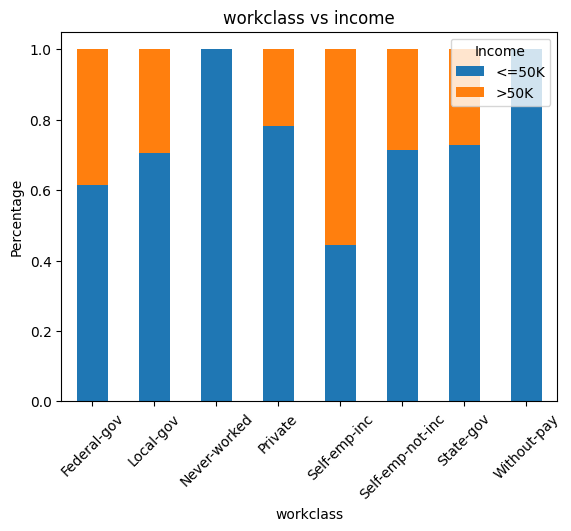

<Figure size 1200x600 with 0 Axes>

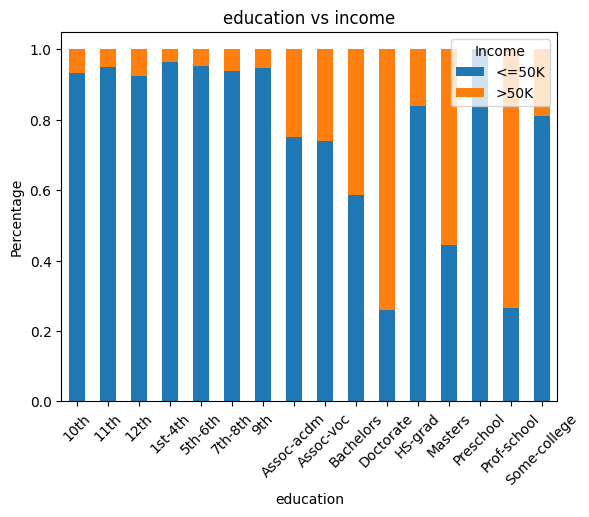

<Figure size 1200x600 with 0 Axes>

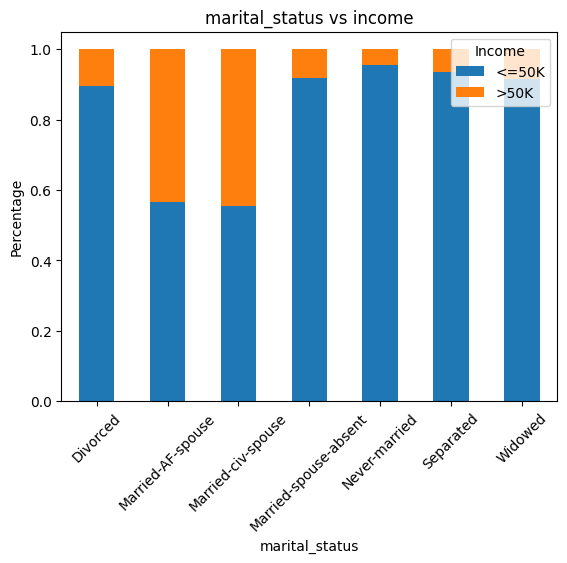

<Figure size 1200x600 with 0 Axes>

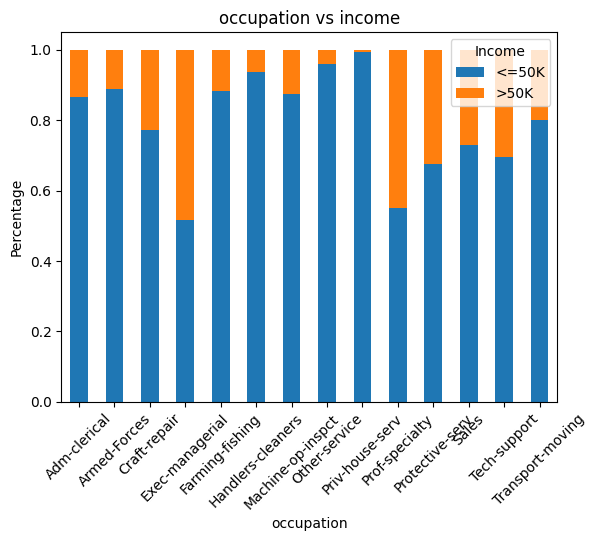

<Figure size 1200x600 with 0 Axes>

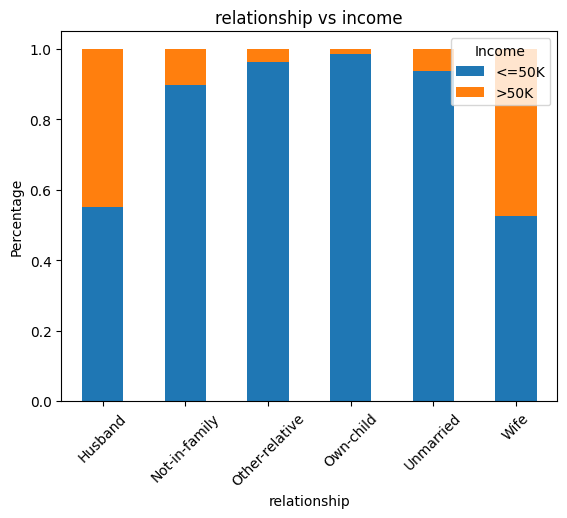

<Figure size 1200x600 with 0 Axes>

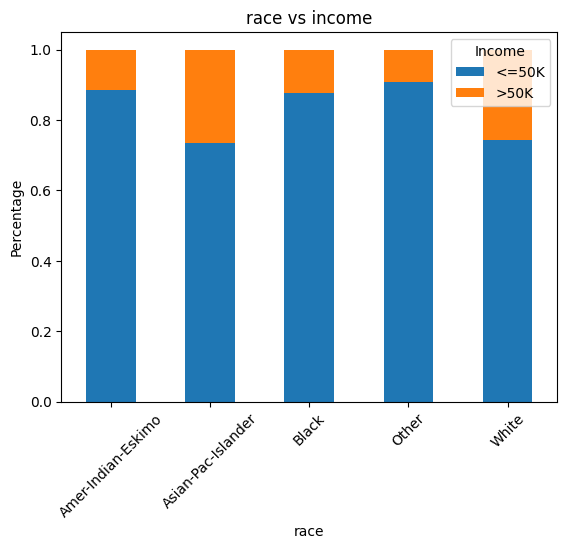

<Figure size 1200x600 with 0 Axes>

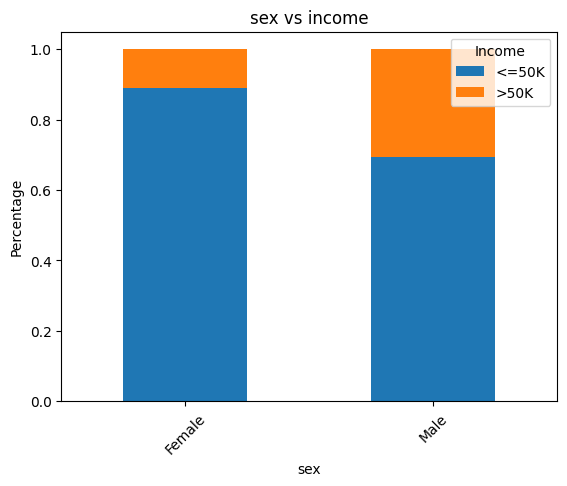

<Figure size 1200x600 with 0 Axes>

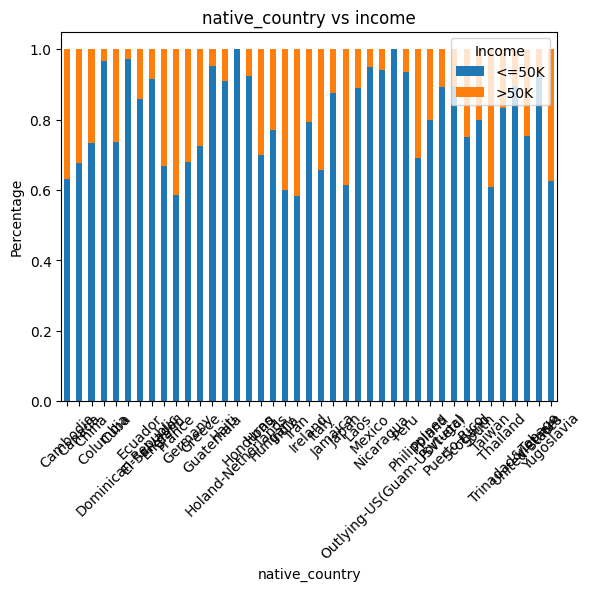

In [16]:
for feature in categorical_features:
  if(feature != 'income'):
    plt.figure(figsize=(12,6))
    df_temp = df.groupby([feature,'income']).size().unstack()
    df_temp_perc = df_temp.div(df_temp.sum(axis=1),axis=0)
    df_temp_perc.plot(kind='bar', stacked=True)
    plt.title(f'{feature} vs income')
    plt.xlabel(feature)
    plt.ylabel('Percentage')
    plt.legend(title='Income', loc='upper right')
    plt.xticks(rotation=45)
    plt.show()

<Figure size 1200x600 with 0 Axes>


# **Unit 3 Validasi Data**

# **Periksa Missing Values**

In [17]:
# Hitung jumlah missing values
missing_values = df.isnull().sum()

# Hitung persentase missing values per kolom
missing_percentage = 100 * missing_values / len(df)

# Jumlahkan persentase missing values dari seluruh kolom
total_percentage_sum = missing_percentage.sum()

# Gabungkan informasi missing values
missing_table = pd.concat([missing_values, missing_percentage], axis=1, keys=['Total', 'Percent'])
print(missing_table)
print(f"\nTotal Penjumlahan Persentase Missing Values per Kolom: {total_percentage_sum:.2f}%")


                Total   Percent
age                 0  0.000000
workclass        1836  5.638647
fnlwgt              0  0.000000
education           0  0.000000
education_num       0  0.000000
marital_status      0  0.000000
occupation       1843  5.660146
relationship        0  0.000000
race                0  0.000000
sex                 0  0.000000
capital_gain        0  0.000000
capital_loss        0  0.000000
hours_per_week      0  0.000000
native_country    583  1.790486
income              0  0.000000

Total Penjumlahan Persentase Missing Values per Kolom: 13.09%


# **Visualisasi Missing Values**

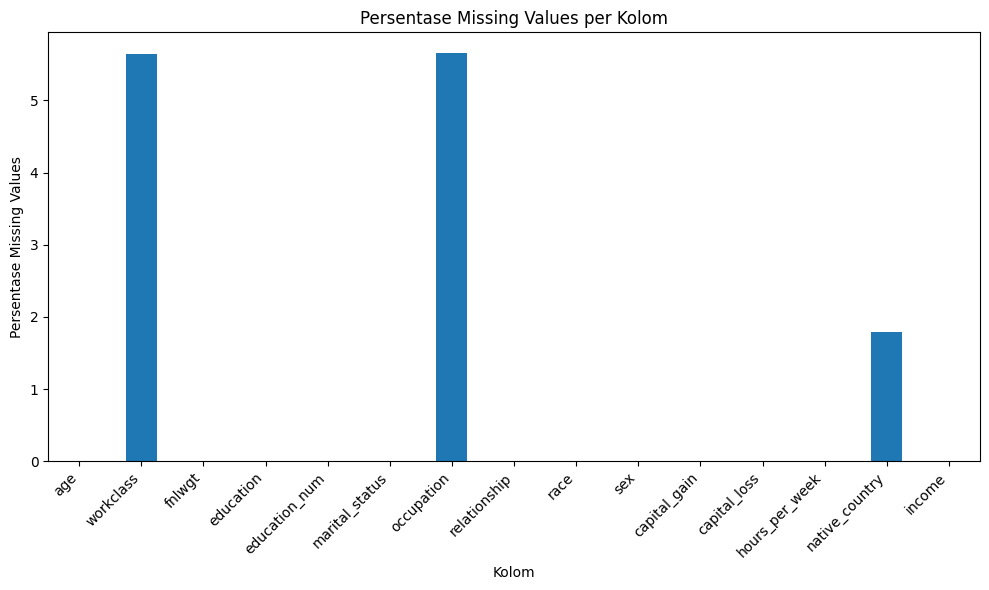

In [18]:
# Visualisasi Missing Values
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar')
plt.title('Persentase Missing Values per Kolom')
plt.xlabel('Kolom')
plt.ylabel('Persentase Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Periksa Duplikat**

In [19]:
#Hitung Jumlah Duplikat
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

#Tampilkan beberapa baris duplikat (jika ada)
if duplicates > 0:
    print("\nContoh baris duplikat:")
    print(df[df.duplicated(keep=False)].head())

Jumlah baris duplikat: 24

Contoh baris duplikat:
      age workclass  fnlwgt     education  education_num marital_status  \
2303   90   Private   52386  Some-college             10  Never-married   
3917   19   Private  251579  Some-college             10  Never-married   
4325   25   Private  308144     Bachelors             13  Never-married   
4767   21   Private  250051  Some-college             10  Never-married   
4881   25   Private  308144     Bachelors             13  Never-married   

          occupation   relationship                race     sex  capital_gain  \
2303   Other-service  Not-in-family  Asian-Pac-Islander    Male             0   
3917   Other-service      Own-child               White    Male             0   
4325    Craft-repair  Not-in-family               White    Male             0   
4767  Prof-specialty      Own-child               White  Female             0   
4881    Craft-repair  Not-in-family               White    Male             0   

      capita

# **Validasi Tipe Data**

In [20]:
#Tampilkan tipe data setiap kolom
print(df.dtypes)

#Periksa apakah ada nilai non-numerik dalam kolom numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    non_numeric = df[pd.to_numeric(df[col], errors='coerce').isna()]
    if len(non_numeric) > 0:
        print(f"\nNilai non-numerik dalam kolom {col}:")
        print(non_numeric[col].unique())

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


# **Validasi Nilai Range**

In [21]:
# Periksa range nilai untuk kolom numerik
for col in numeric_columns:
    min_val = df[col].min()
    max_val = df[col].max()
    print(f"\nKolom: {col}")
    print(f"Nilai Minimum: {min_val}")
    print(f"Nilai Maksimum: {max_val}")

#Periksa range nilai untuk kolom numerik cara 2
'''
for col in numeric_columns:
   print(f"\nRange nilai untuk {col}: ")
   print(f"Min : {df[col].min()}, Max : {df[col].max()}")
'''

# Periksa kategori unik untuk kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nKategori unik dalam kolom {col}:")
    print(df[col].unique())


Kolom: age
Nilai Minimum: 17
Nilai Maksimum: 90

Kolom: fnlwgt
Nilai Minimum: 12285
Nilai Maksimum: 1484705

Kolom: education_num
Nilai Minimum: 1
Nilai Maksimum: 16

Kolom: capital_gain
Nilai Minimum: 0
Nilai Maksimum: 99999

Kolom: capital_loss
Nilai Minimum: 0
Nilai Maksimum: 4356

Kolom: hours_per_week
Nilai Minimum: 1
Nilai Maksimum: 99

Kategori unik dalam kolom workclass:
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Kategori unik dalam kolom education:
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Kategori unik dalam kolom marital_status:
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Kategori unik dalam kolom occupation:
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sa

# **Periksa Konsistensi Data**

In [22]:
# Contoh: Periksa konsistensi antara "education" dan "education_num"
education_mapping = df.groupby('education')['education_num'].mean().sort_values()
print("\nPemetaan rata rata 'education_num' untuk setiap 'education': ")
print(education_mapping)


Pemetaan rata rata 'education_num' untuk setiap 'education': 
education
Preschool        1.0
1st-4th          2.0
5th-6th          3.0
7th-8th          4.0
9th              5.0
10th             6.0
11th             7.0
12th             8.0
HS-grad          9.0
Some-college    10.0
Assoc-voc       11.0
Assoc-acdm      12.0
Bachelors       13.0
Masters         14.0
Prof-school     15.0
Doctorate       16.0
Name: education_num, dtype: float64


# **Visualisasi Konsistensi**

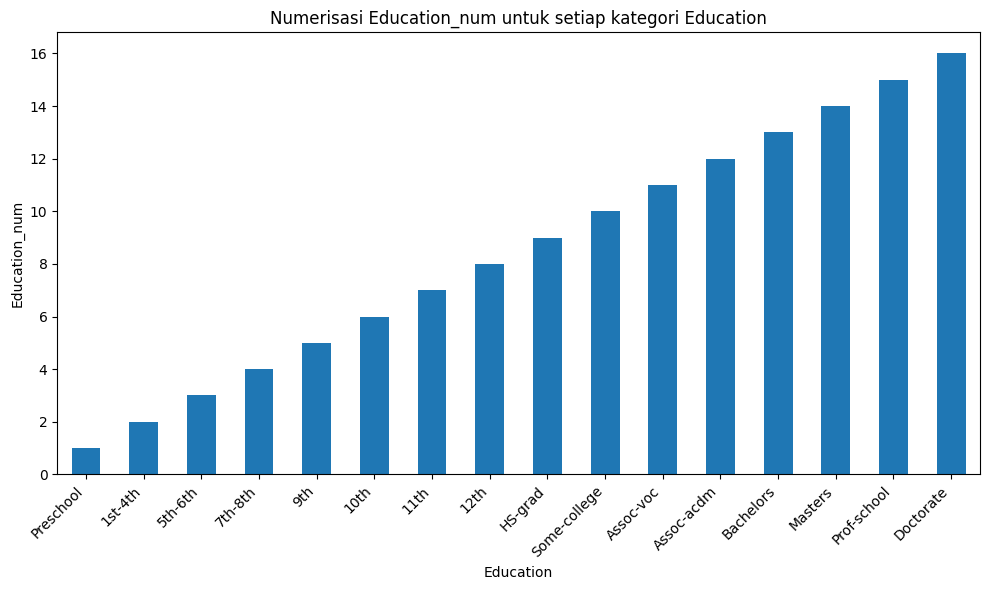

In [23]:
# Visualisasi konsistensi
plt.figure(figsize=(10, 6))
education_mapping.plot(kind='bar')
plt.title('Numerisasi Education_num untuk setiap kategori Education')
plt.xlabel('Education')
plt.ylabel('Education_num')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **UNIT 4 : Menentukan Objek Data**

In [24]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# **UNIT 5 : Membersihkan Data**

# **Menangani Missing Values**

In [25]:
# Cek missing values
print("Missing values sebelum pembersihan:")
print(df.isnull().sum())

# Menangani missing values
for column in df.columns:
    if df[column].dtype == 'object':
        # Untuk kolom kategorikal, isi dengan modus
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # Untuk kolom numerik, isi dengan median
        df[column].fillna(df[column].median(), inplace=True)

print("\nMissing values setelah pembersihan:")
print(df.isnull().sum())



Missing values sebelum pembersihan:
age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

Missing values setelah pembersihan:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


<ipython-input-25-e4a6bdf15d5b>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
<ipython-input-25-e4a6bdf15d5b>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

# **Menangani Outlier**

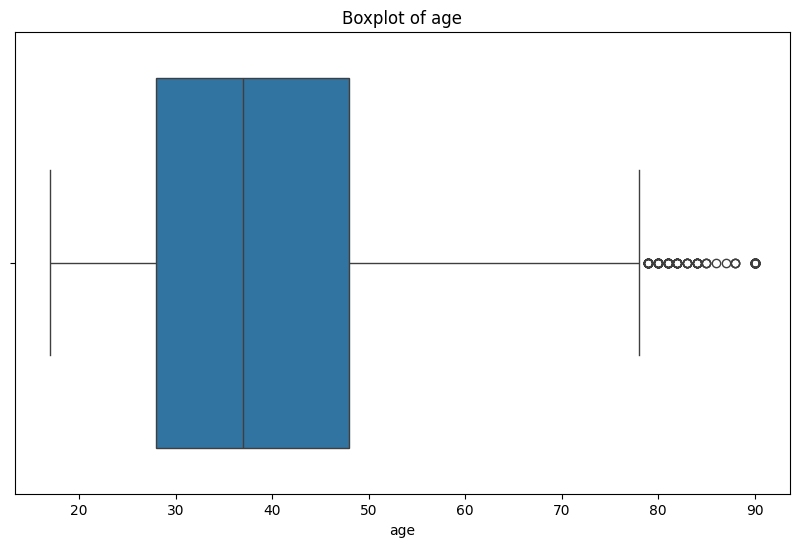

Outliers pada age sudah dihandel.


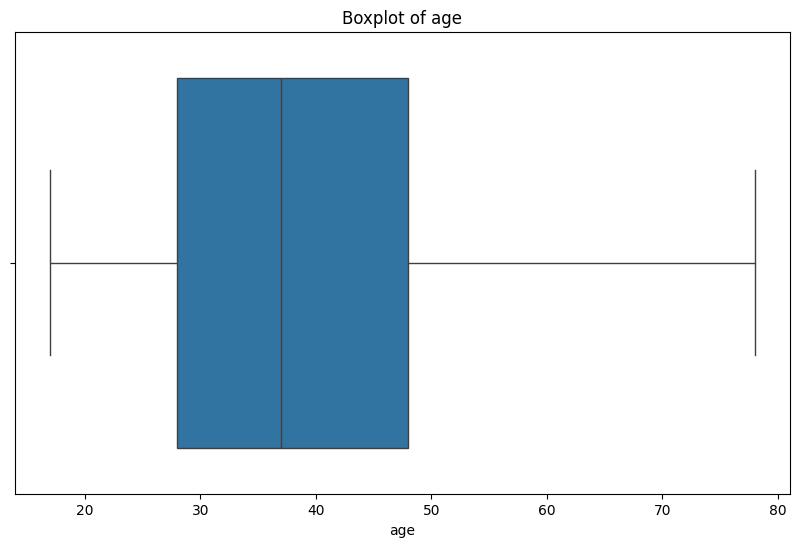

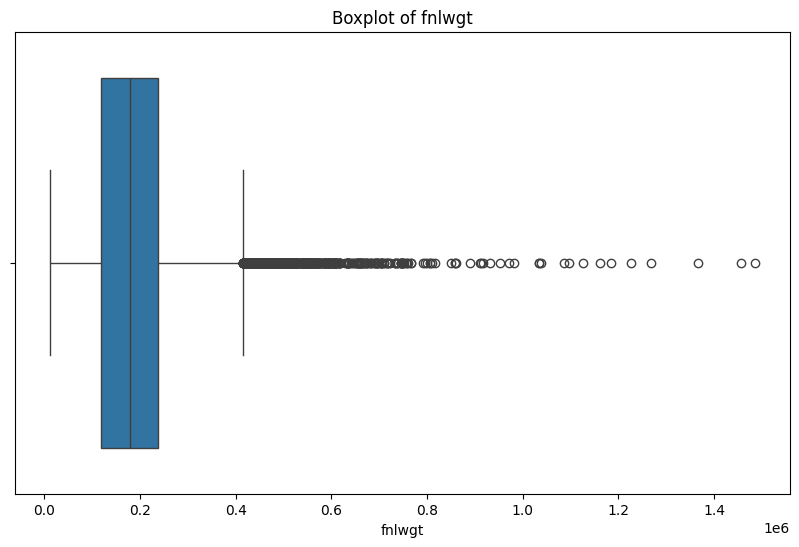

Outliers pada fnlwgt sudah dihandel.


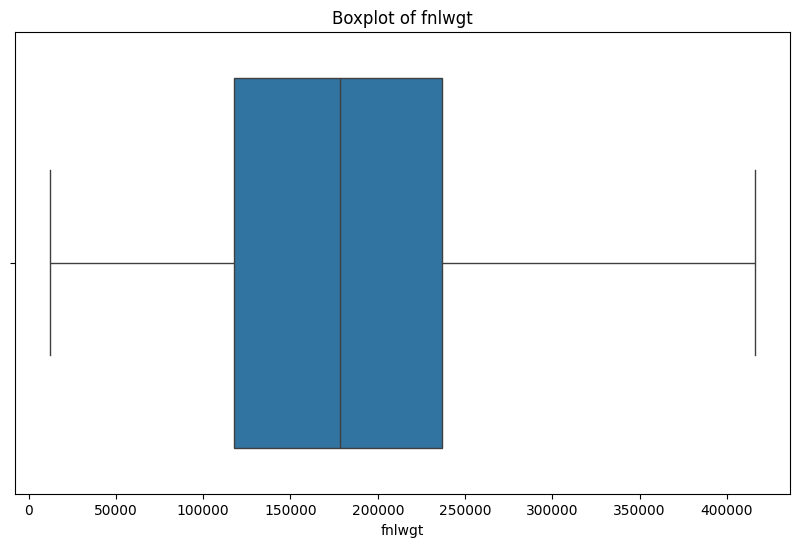

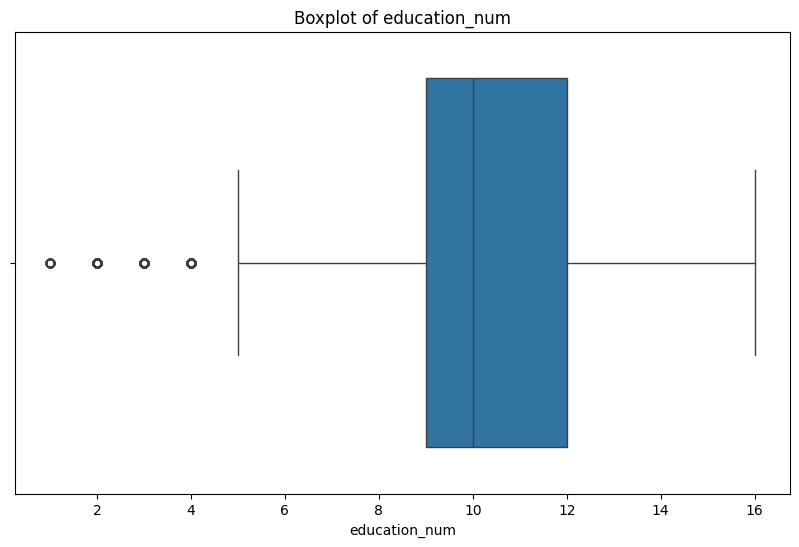

Outliers pada education_num sudah dihandel.


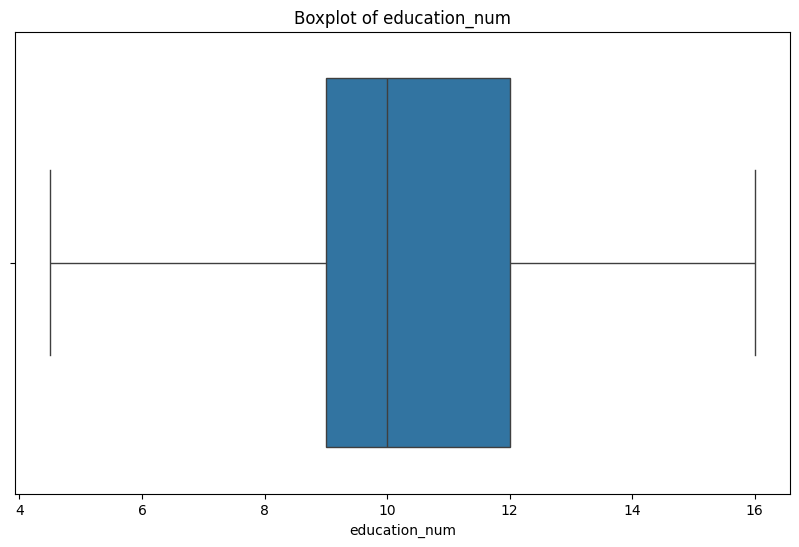

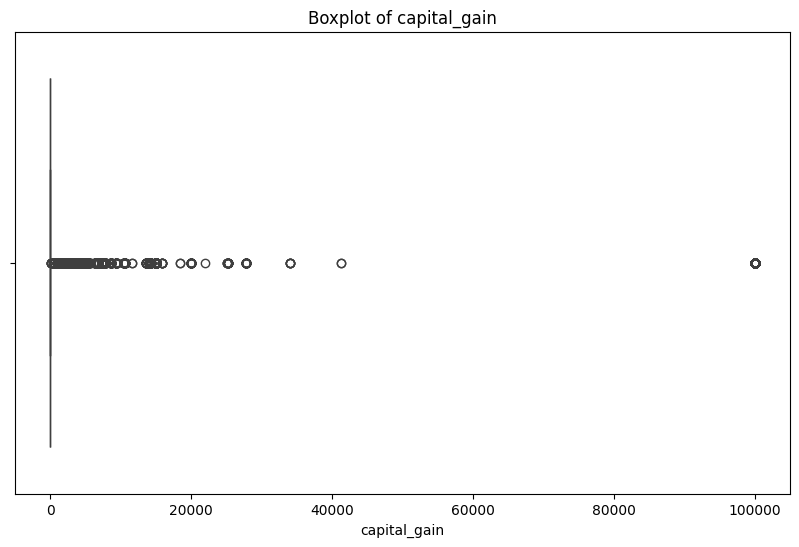

Outliers pada capital_gain sudah dihandel.


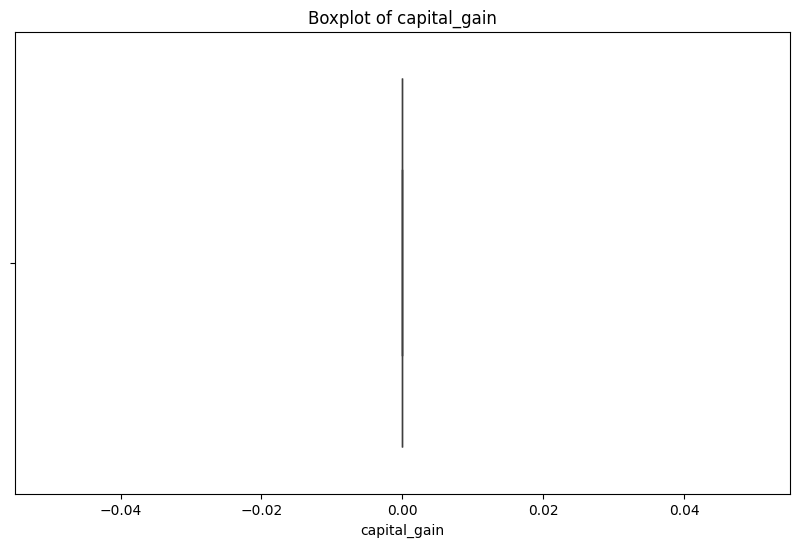

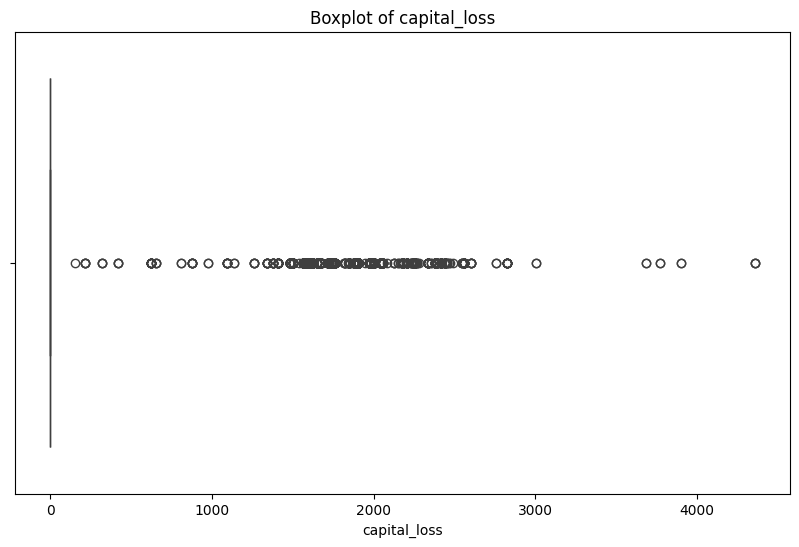

Outliers pada capital_loss sudah dihandel.


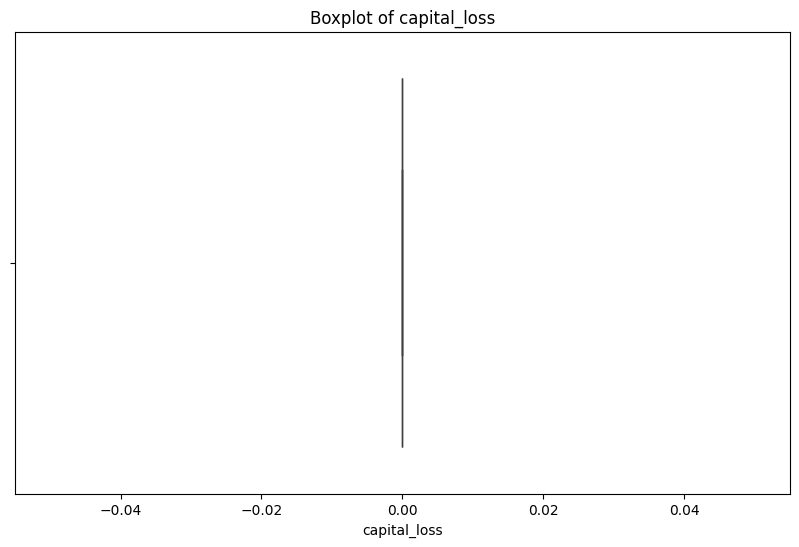

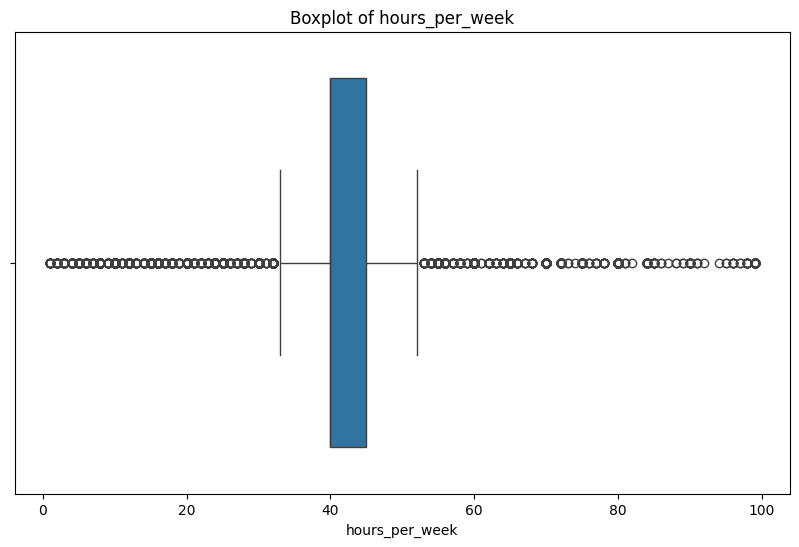

Outliers pada hours_per_week sudah dihandel.


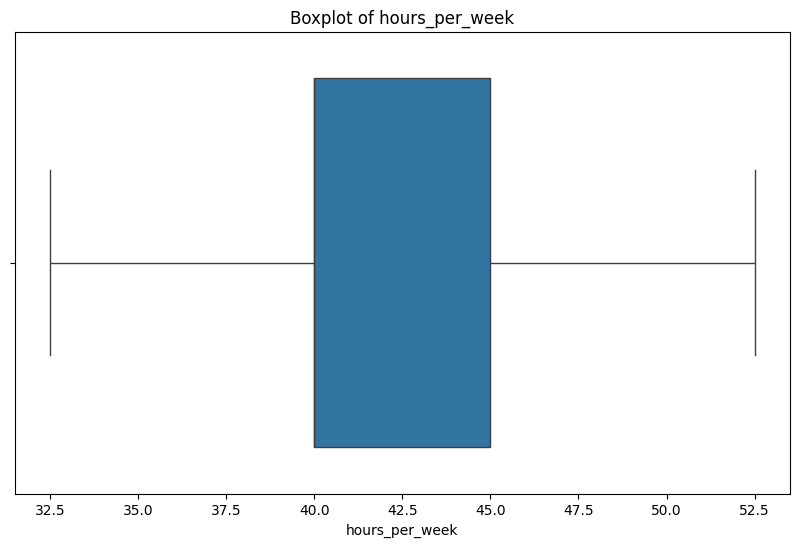

In [26]:
def plot_boxplot(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Contoh untuk kolom numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns

for column in numeric_columns:
    plot_boxplot(df, column)

    # Menangani outlier dengan IQR method
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] > upper_bound, upper_bound,
                          np.where(df[column] < lower_bound, lower_bound, df[column]))

    print(f"Outliers pada {column} sudah dihandel.")
    plot_boxplot(df, column)

# **Menangani Duplikat**

In [27]:
# Cek duplikat
duplicate_count = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_count}")

# Hapus duplikat
df.drop_duplicates(inplace=True)

print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")


Jumlah baris duplikat: 53
Jumlah baris setelah menghapus duplikat: 32508


# **Validasi Hasil**

In [28]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


# **Menyimpan Dataset Yang Sudah di Bersihkan**

In [29]:
# Simpan data yang telah dibersihkan
sys.path.append(f'{folder_name}')
df.to_csv(f'{folder_name}/adult_income_cleaned.csv', index=False)
print("Data yang telah dibersihkan telah disimpan sebagai 'adult_income_cleaned.csv'")

Data yang telah dibersihkan telah disimpan sebagai 'adult_income_cleaned.csv'


# **UNIT 6 : MEREKONSTRUKSI DATA**

# **Pengelompokan Data**

In [30]:
# membuat fitur baru berdasarkan usia
df['age_group'] = pd.cut(df['age'], bins=[0,18,30,45,60,100], labels=["Remaja", "Dewasa Muda", "Dewasa", "Paruh Baya", "Lansia"])

# menggabungkan capital_gain dan capital_loss
df['net_capital'] = df['capital_gain'] - df['capital_loss']

# membuat fitur rasio jam kerja terhadap rata-rata jam kerja
df['work_hours_ratio'] = df['hours_per_week'] / df['hours_per_week'].mean()

# membuat fitur kategorikal baru berdasarkan education_num
df['education_level'] = pd.cut(df['education_num'], bins=[0,8,12,16,20], labels=['Dasar', 'Menengah','Sarjana', 'Pascasarjana'])

df[['age_group', 'net_capital', 'work_hours_ratio', 'education_level']].head()

,age_group,net_capital,work_hours_ratio,education_level
0,Dewasa,0.0,0.970669,Sarjana
1,Paruh Baya,0.0,0.788668,Sarjana
2,Dewasa,0.0,0.970669,Menengah
3,Paruh Baya,0.0,0.970669,Dasar
4,Dewasa Muda,0.0,0.970669,Sarjana


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32508 entries, 0 to 32560
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               32508 non-null  float64 
 1   workclass         32508 non-null  object  
 2   fnlwgt            32508 non-null  float64 
 3   education         32508 non-null  object  
 4   education_num     32508 non-null  float64 
 5   marital_status    32508 non-null  object  
 6   occupation        32508 non-null  object  
 7   relationship      32508 non-null  object  
 8   race              32508 non-null  object  
 9   sex               32508 non-null  object  
 10  capital_gain      32508 non-null  float64 
 11  capital_loss      32508 non-null  float64 
 12  hours_per_week    32508 non-null  float64 
 13  native_country    32508 non-null  object  
 14  income            32508 non-null  object  
 15  age_group         32508 non-null  category
 16  net_capital       32508 non

In [32]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_group,net_capital,work_hours_ratio,education_level
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,Dewasa,0.0,0.970669,Sarjana
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,United-States,<=50K,Paruh Baya,0.0,0.788668,Sarjana
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,Dewasa,0.0,0.970669,Menengah
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,Paruh Baya,0.0,0.970669,Dasar
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K,Dewasa Muda,0.0,0.970669,Sarjana


# **Transformasi Data**

In [33]:
# Periksa kategori unik untuk kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nKategori unik dalam kolom {col}:")
    print(df[col].unique())


Kategori unik dalam kolom workclass:
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Kategori unik dalam kolom education:
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Kategori unik dalam kolom marital_status:
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Kategori unik dalam kolom occupation:
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']

Kategori unik dalam kolom relationship:
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

Kategori unik dalam kolom race:
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Es

In [34]:
# lakukan mapping data kategorikal menjadi numerik

# workclass
workclass = {'State-gov': 7, 'Self-emp-not-inc': 6, 'Private': 5,  'Federal-gov': 4, 'Local-gov': 3,
 'Self-emp-inc': 2, 'Without-pay': 1, 'Never-worked': 0}
df['workclass'] = df['workclass'].map(workclass)

# education tidak perlu dilakukan mapping, karena sudah di mapping pada education_num

# marital_status
marital_status = {
    'Never-married': 6,
    'Married-civ-spouse': 5,
    'Divorced': 4,
    'Married-spouse-absent': 3,
    'Separated': 2,
    'Married-AF-spouse': 1,
    'Widowed': 0
}
df['marital_status'] = df['marital_status'].map(marital_status)

# ocucpation
occupation = {
    'Adm-clerical': 13,
    'Exec-managerial': 12,
    'Handlers-cleaners': 11,
    'Prof-specialty': 10,
    'Other-service': 9,
    'Sales': 8,
    'Craft-repair': 7,
    'Transport-moving': 6,
    'Farming-fishing': 5,
    'Machine-op-inspct': 4,
    'Tech-support': 3,
    'Protective-serv': 2,
    'Armed-Forces': 1,
    'Priv-house-serv': 0
}

df['occupation'] = df['occupation'].map(occupation)

# realtionship
relationship = {
    'Not-in-family': 5,
    'Husband': 4,
    'Wife': 3,
    'Own-child': 2,
    'Unmarried': 1,
    'Other-relative': 0
}
df['relationship'] = df['relationship'].map(relationship)

# race
race = {
    'White': 4,
    'Black': 3,
    'Asian-Pac-Islander': 2,
    'Amer-Indian-Eskimo': 1,
    'Other': 0
}
df['race'] = df['race'].map(race)

# sex
sex = {'Male': 1, 'Female': 0}
df['sex'] = df['sex'].map(sex)

# native_country
native_country = {
    'United-States': 40,
    'Cuba': 39,
    'Jamaica': 38,
    'India': 37,
    'Mexico': 36,
    'South': 35,
    'Puerto-Rico': 34,
    'Honduras': 33,
    'England': 32,
    'Canada': 31,
    'Germany': 30,
    'Iran': 29,
    'Philippines': 28,
    'Italy': 27,
    'Poland': 26,
    'Columbia': 25,
    'Cambodia': 24,
    'Thailand': 23,
    'Ecuador': 22,
    'Laos': 21,
    'Taiwan': 20,
    'Haiti': 19,
    'Portugal': 18,
    'Dominican-Republic': 17,
    'El-Salvador': 16,
    'France': 15,
    'Guatemala': 14,
    'China': 13,
    'Japan': 12,
    'Yugoslavia': 11,
    'Peru': 10,
    'Outlying-US(Guam-USVI-etc)': 9,
    'Scotland': 8,
    'Trinadad&Tobago': 7,
    'Greece': 6,
    'Nicaragua': 5,
    'Vietnam': 4,
    'Hong': 3,
    'Ireland': 2,
    'Hungary': 1,
    'Holand-Netherlands': 0
}
df['native_country'] = df['native_country'].map(native_country)

# income
income = {'<=50K': 1, '>50K': 0}
df['income'] = df['income'].map(income)


In [35]:
# Tambahan

# age_group
age_group = {'Remaja': 1, 'Dewasa Muda': 2, 'Dewasa': 3, 'Paruh Baya': 4, 'Lansia': 5}
df['age_group'] = df['age_group'].map(age_group)

# education_level
education_level = {'Dasar': 1, 'Menengah': 2, 'Sarjana': 3, 'Pascasarjana': 4}
df['education_level'] = df['education_level'].map(education_level)


# **Menampilkan data yang sudah dikonversi**

In [36]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_group,net_capital,work_hours_ratio,education_level
0,39.0,7,77516.0,Bachelors,13.0,6,13,5,4,1,0.0,0.0,40.0,40,1,3,0.0,0.970669,3
1,50.0,6,83311.0,Bachelors,13.0,5,12,4,4,1,0.0,0.0,32.5,40,1,4,0.0,0.788668,3
2,38.0,5,215646.0,HS-grad,9.0,4,11,5,4,1,0.0,0.0,40.0,40,1,3,0.0,0.970669,2
3,53.0,5,234721.0,11th,7.0,5,11,4,3,1,0.0,0.0,40.0,40,1,4,0.0,0.970669,1
4,28.0,5,338409.0,Bachelors,13.0,5,10,3,3,0,0.0,0.0,40.0,39,1,2,0.0,0.970669,3


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32508 entries, 0 to 32560
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               32508 non-null  float64 
 1   workclass         32508 non-null  int64   
 2   fnlwgt            32508 non-null  float64 
 3   education         32508 non-null  object  
 4   education_num     32508 non-null  float64 
 5   marital_status    32508 non-null  int64   
 6   occupation        32508 non-null  int64   
 7   relationship      32508 non-null  int64   
 8   race              32508 non-null  int64   
 9   sex               32508 non-null  int64   
 10  capital_gain      32508 non-null  float64 
 11  capital_loss      32508 non-null  float64 
 12  hours_per_week    32508 non-null  float64 
 13  native_country    32508 non-null  int64   
 14  income            32508 non-null  int64   
 15  age_group         32508 non-null  category
 16  net_capital       32508 non

karena diatas masih ada tipe data kategorikal yang tersempil maka kita harus melakukan konversi ke int/float64

In [38]:
# konversi tipe data kategorikal menjadi int/float64
# contoh :
# df['nama_kolom'] = df['nama_kolom'].astype(str).astype(float)

df['age_group'] = df['age_group'].astype(str).astype(float)
df['education_level'] = df['education_level'].astype(str).astype(float)


In [39]:
# hapus education karena sudah ada education_num
df.drop('education', axis=1, inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32508 entries, 0 to 32560
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               32508 non-null  float64
 1   workclass         32508 non-null  int64  
 2   fnlwgt            32508 non-null  float64
 3   education_num     32508 non-null  float64
 4   marital_status    32508 non-null  int64  
 5   occupation        32508 non-null  int64  
 6   relationship      32508 non-null  int64  
 7   race              32508 non-null  int64  
 8   sex               32508 non-null  int64  
 9   capital_gain      32508 non-null  float64
 10  capital_loss      32508 non-null  float64
 11  hours_per_week    32508 non-null  float64
 12  native_country    32508 non-null  int64  
 13  income            32508 non-null  int64  
 14  age_group         32508 non-null  float64
 15  net_capital       32508 non-null  float64
 16  work_hours_ratio  32508 non-null  float64
 17

sekarang sudah tidak ada lagi selain int dan float64 maka bisa dilanjutkan

# **Cek Kembali Korelasi Antar Features**

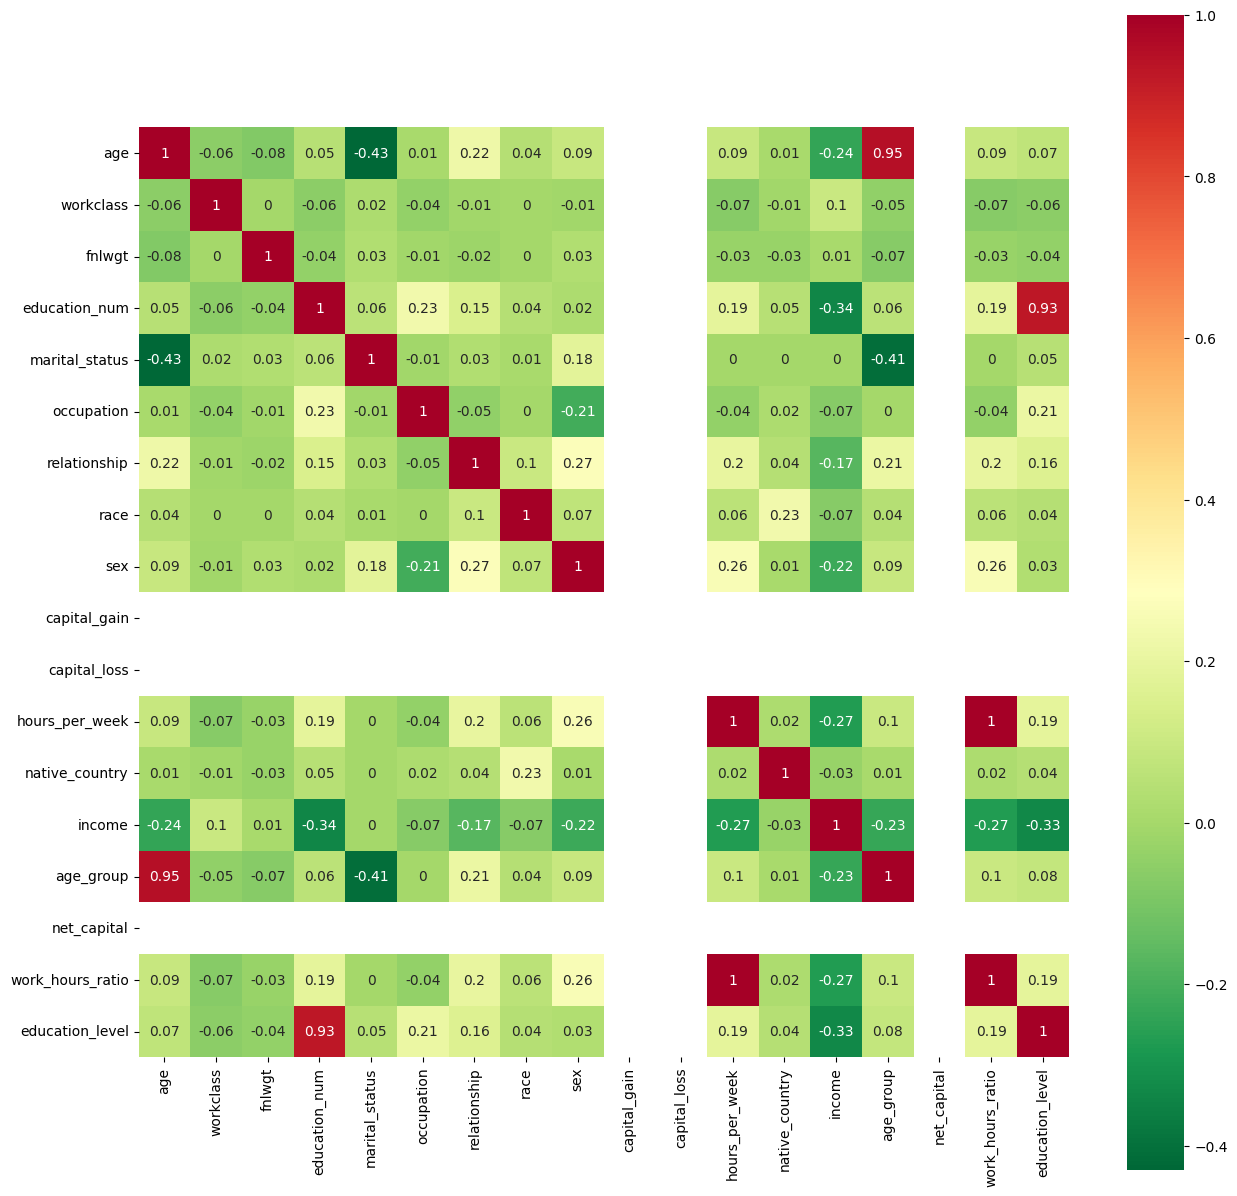

In [41]:
# Correlation Heatmap
correlation = df.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(correlation.round(2),
            annot=True,
            vmax=1,
            square=True,
            cmap='RdYlGn_r')
plt.show()


Dari heatmap:
- ada beberapa feature yang tidak ada karena sudah dihapus pada saat melakukan pemmbersihan data

# **Fitur berkolerasi tinggi (>=0.9) : **
- # age vs age_group: Korelasi 0.95.
Solusi: Hapus salah satu. Misalnya, jika age lebih relevan secara interpretasi, maka hapus age_group.

- # education_num vs education_level: Korelasi 0.93.
Solusi: Hapus salah satu. Jika education_num sudah numerik dan lebih informatif, maka hapus education_level.

- # work_hours_ratio vs hours_per_week: Korelasi 1.0.
Solusi: Ini menunjukkan duplikat fitur. Hapus salah satunya.

# **Penghapusan Fitur Bernilai Konstan**

In [42]:
# menghapus kolom yang memiliki nilai konstan
df = df.loc[:, df.apply(pd.Series.nunique) != 1]
df

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income,age_group,work_hours_ratio,education_level
0,39.0,7,77516.0,13.0,6,13,5,4,1,40.0,40,1,3.0,0.970669,3.0
1,50.0,6,83311.0,13.0,5,12,4,4,1,32.5,40,1,4.0,0.788668,3.0
2,38.0,5,215646.0,9.0,4,11,5,4,1,40.0,40,1,3.0,0.970669,2.0
3,53.0,5,234721.0,7.0,5,11,4,3,1,40.0,40,1,4.0,0.970669,1.0
4,28.0,5,338409.0,13.0,5,10,3,3,0,40.0,39,1,2.0,0.970669,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,5,257302.0,12.0,5,3,3,4,0,38.0,40,1,2.0,0.922135,2.0
32557,40.0,5,154374.0,9.0,5,4,4,4,1,40.0,40,0,3.0,0.970669,2.0
32558,58.0,5,151910.0,9.0,0,13,1,4,0,40.0,40,1,4.0,0.970669,2.0
32559,22.0,5,201490.0,9.0,6,13,2,4,1,32.5,40,1,2.0,0.788668,2.0


# **Penghapusan Fitur Berkolerasi Tinggi**

In [43]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [44]:
data_tanpa_target = df.drop('income', axis=1)
correlated_features = correlation(data_tanpa_target, 0.8)
print("Fitur berkorelasi tinggi yang akan dihapus :")
correlated_features

Fitur berkorelasi tinggi yang akan dihapus :


{'age_group', 'education_level', 'work_hours_ratio'}

In [45]:
df.drop(labels=correlated_features, axis=1, inplace=True)

<ipython-input-45-fb13f3a6367b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(labels=correlated_features, axis=1, inplace=True)


# **Pengecekan Ulang Korelasi**

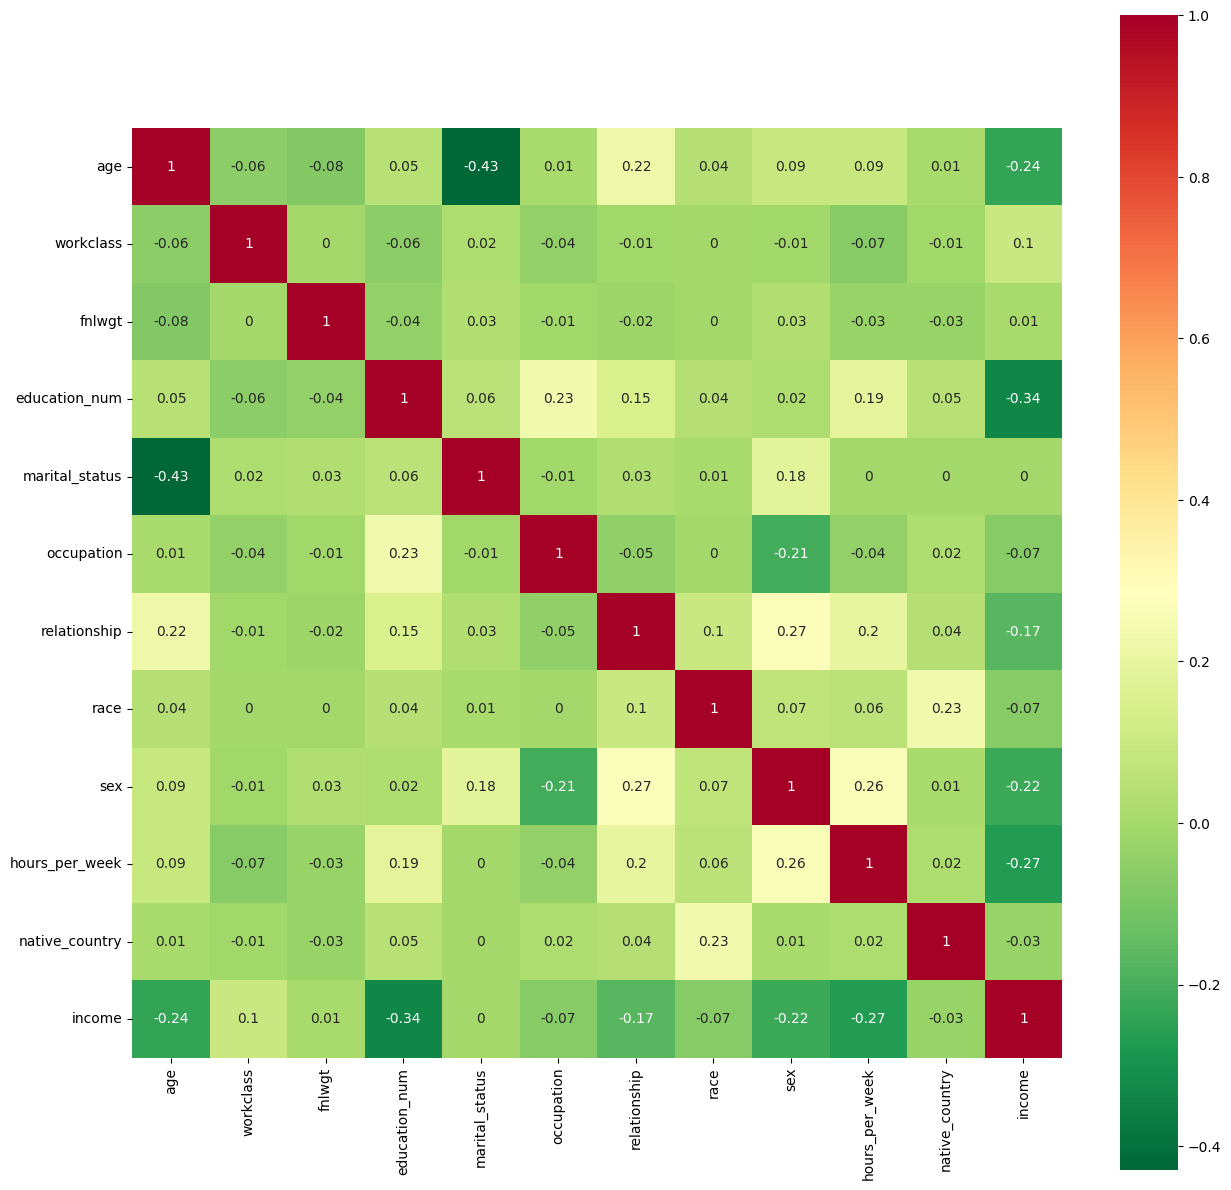

In [46]:
# Correlation Heatmap
correlation = df.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(correlation.round(2),
            annot=True,
            vmax=1,
            square=True,
            cmap='RdYlGn_r')
plt.show()


# **UNIT 7 (1): Membangun Model**

Tujuan : Membuat dan melatih model machine learning untuk memprediksi income berdasarkan dataset yang telah dipersiapkan

# **Persiapan Data**

In [47]:
from sklearn.model_selection import train_test_split
# pisahkan fitur dan target
x = df.drop('income', axis=1)
y = df['income']

# pisahkan data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)


# **Membangun dengan Decision Tree**

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

# inisialisasi model
dt_model = DecisionTreeClassifier(random_state=42)

# melatih model
dt_model.fit(x_train, y_train)

# melakukan prediksi
y_pred = dt_model.predict(x_test)

# evaluasi
print("Decission Tree Performance")
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average="micro"))
print("Precision:", precision_score(y_test, y_pred, average="micro"))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Decission Tree Performance
Akurasi: 0.7782220855121501
Recall: 0.7782220855121501
Precision: 0.7782220855121501

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.54      0.54      1567
           1       0.85      0.85      0.85      4935

    accuracy                           0.78      6502
   macro avg       0.70      0.70      0.70      6502
weighted avg       0.78      0.78      0.78      6502



Kriteria :


*   Berapapun hasil accuracy, precission, recall selama nilainya di range yang sama (yaitu **0.7782220855121501**), menunjukkan bahwa preprocessing yang kita gunakan sudah benar dan sesuai



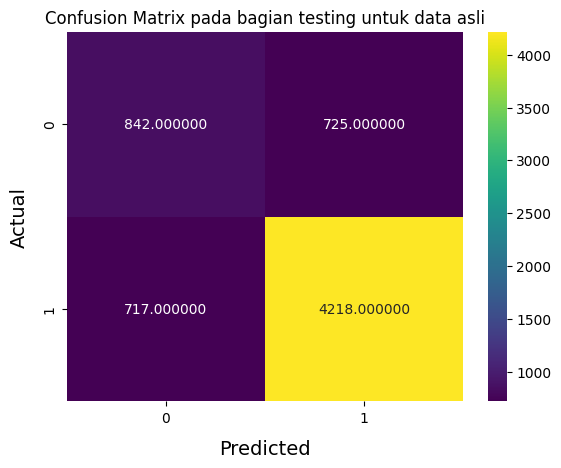

In [49]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="viridis", fmt="0f")
plt.xlabel("Predicted", fontdict={'size':14}, labelpad=10)
plt.ylabel("Actual", fontdict={'size':14}, labelpad=10)
plt.title("Confusion Matrix pada bagian testing untuk data asli")
plt.show()

Komponen - komponennya :    
sumbu X: predicted values(Nilai Prediksi)
*   0: Model memprediksi income <= 50K
*   1: Model memprediksi income > 50K

Sumbu Y : Actual Values (Nilai Sebenarnya)
*   0: Income sebenarnya <= 50K
*   1: Income sebenarnya > 50K





Nilai dalam setiap sel :
*   Kiri Atas (842): True Negatives (TN) - Benar diprediksi  <= 50K
*   Kanan Atas (725): False Positives (FP) - Salah diprediksi > 50K
*   Kiri Bawah (717): False Negatives (FN) - Salah diprediksi <= 50K
*   Kanan Bawah (4218): True Positives (TP) - Benar diprediksi >50K

Interpretasi :    
* Akurasi :  Model benar dalam (4218+842) / (842+725+717+4218) = 0.778222086 = 77,8% kasus
* Presisi untuk > 50K :  4218 / (725 + 4218) = 0.853327938 = 85,3%
* Recall untuk > 50K : 4218 / (717 + 4218) = 0.854711246 = 85,4%
*  Model cenderung lebih baik dalam memprediksi income >50K (4218 benar vs 725 salah)
* Ada jumlah signifikan false positives (725) dan false negatives (717), menunjukkan ada ruang untuk peningkatan.


Kesimpulan :    
* Model memiliki performa cukup baik dalam mengidentifikasi income >50K. Namun, model mengalami kesulitan dalama memprediksi income <=50K dengan akurat
* Ada keseimbangan yang cukup abik antara false positives dan false negatives, menunjukkan model tidak terlalu bias ke salah satu kelas.
* Untuk meningkatkan model, fokus mungkin perlu diberikan pada fitur-fitur yang lebih baik membedakan antara 2 kategori income terutama untuk kasus income <=50K

# **Feature Importance**

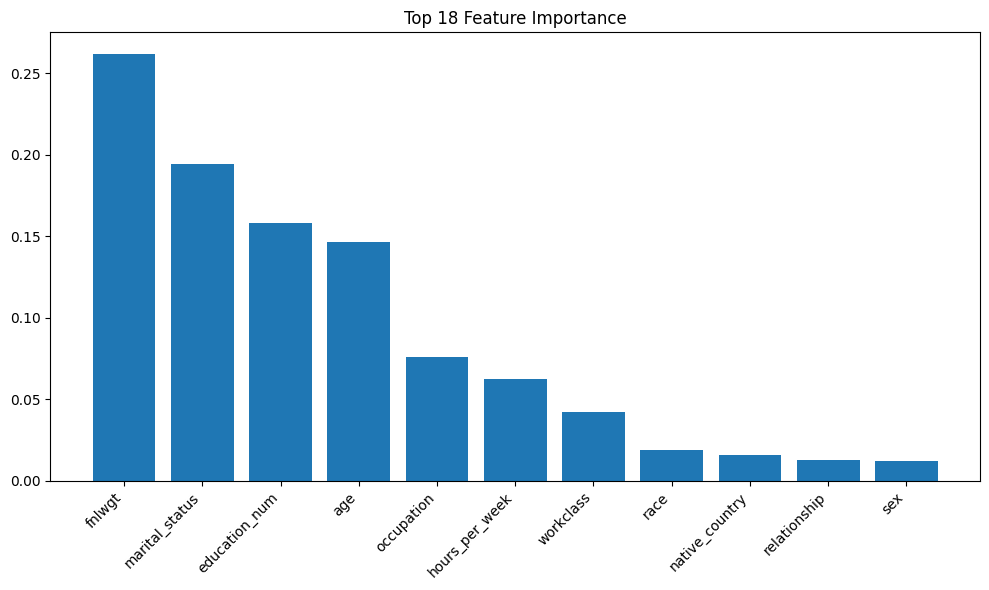

In [50]:
feature_importance = pd.DataFrame({'feature': x.columns, 'importance': dt_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'][:18], feature_importance['importance'][:18])
plt.title('Top 18 Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Hyperparameter Tuning**

Hyperparameter adalah parameter yang tidak dipelajari oleh model selama proses pelatihan, melainkan diatur sebelum proses pelatihan dimulai

Hyperparameter tuning adalah proses mencari nilai optimal dari hyperparameter suatu model machine learning untuk meningkatkan kinerja model tersebut

In [51]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter yang akan diuji
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth':[5,10,15,20],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

# inisialisasi GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# lakukan pencarian
grid_search.fit(x_train, y_train)

# ambil model terbaik
best_model = grid_search.best_estimator_

# tampilkan parameter terbaik
print("Parameter terbaik untuk Decission Tree:")
print(grid_search.best_params_)

print('Best Cross-Validation score: ', grid_search.best_score_)

Parameter terbaik untuk Decission Tree:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Cross-Validation score:  0.8223103592372478


In [52]:
# Gunakan model terbaik
best_dt_model = grid_search.best_estimator_

# prediksi degan model terbaik
y_pred_best_dt = best_dt_model.predict(x_test)

In [53]:
# Evaluasi model terbaik
print("\nBest Decission Tree Performance")
print("Akurasi:", accuracy_score(y_test, y_pred_best_dt))
print("Recall:", recall_score(y_test, y_pred_best_dt, average="micro"))
print("Precision:", precision_score(y_test, y_pred_best_dt, average="micro"))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_dt))


Best Decission Tree Performance
Akurasi: 0.8251307290064596
Recall: 0.8251307290064596
Precision: 0.8251307290064596

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.51      0.58      1567
           1       0.86      0.93      0.89      4935

    accuracy                           0.83      6502
   macro avg       0.77      0.72      0.74      6502
weighted avg       0.81      0.83      0.82      6502



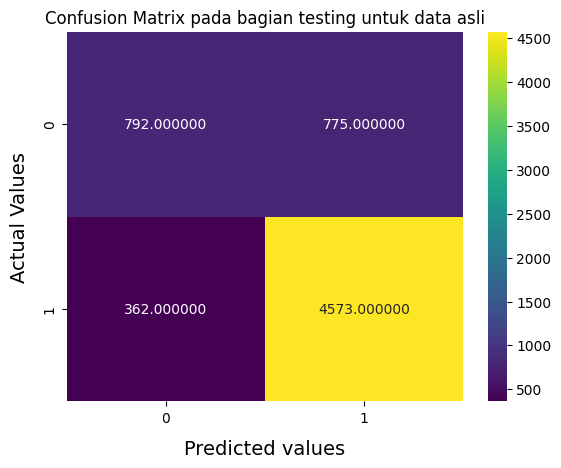

In [54]:
sns.heatmap(confusion_matrix(y_test, y_pred_best_dt), annot=True, cmap="viridis", fmt="0f")
plt.xlabel("Predicted values", fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title("Confusion Matrix pada bagian testing untuk data asli")
plt.show()

Analisis :
Komponen Confusion Matrix :
* True Negatives (TN) : 792 (Kiri Atas)
* False Positives (FP) : 775 (Kanan Atas)
* False Negatives (FN) : 362 (Kiri Bawah)
* True Positives (TP) : 4573 (Kanan Bawah)

Interpretasi :
* Akurasi : (792 + 4573)/(792+775+362+4573) = 0.825130729 = 82.5%
* Presisi untuk > 50K : 4573/(775+4573) = 0.855086013 = 85.5%
* Recall untuk >50K : 4573/(362+4573) = 0.926646403 = 92.6%

Perbedaan dengan gambar sebelumnya :
* TN menurun dari yang sebelumnya 842 vs 792,
* FP meningkat dari  yang sebelumnya 725 vs 775,
* FN menurun dari 717 vs 362,
* TP Meningkat pesat dari 4218 vs 4573


kesimpulan :
* Model ini memiliki performa yang lebih baik dibandingkan dengan model yang sebelumnya
* akurasi meningkat dari 77,7% menjadi 82,5%
* Presisi untuk kelas > 50K juga meningkat
* Model ini lebih baik dalam mengurangi False Negatives

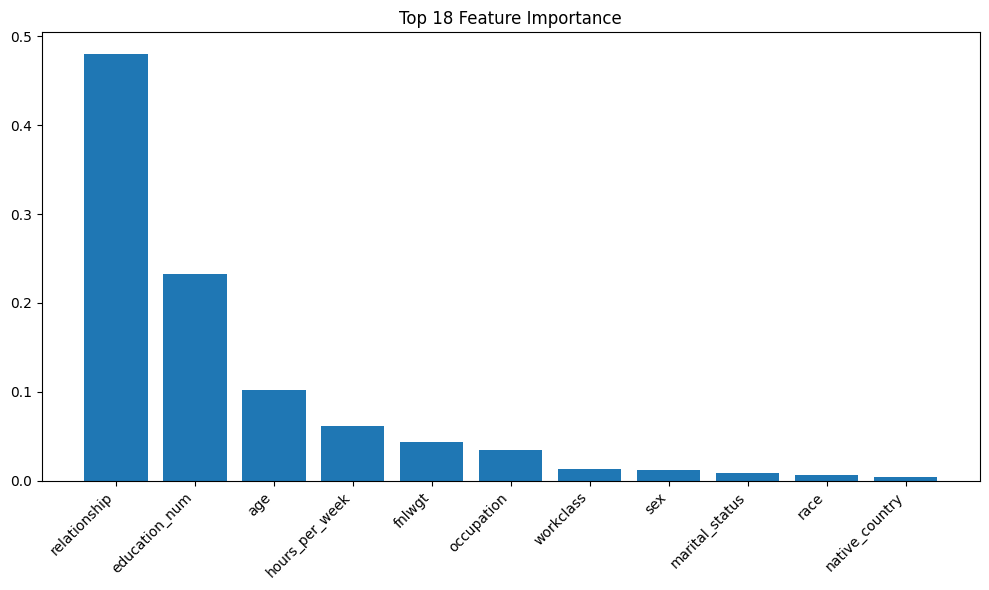

In [55]:
feature_importance = pd.DataFrame({'feature':x.columns, 'importance': best_dt_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'][:18], feature_importance['importance'][:18])
plt.title('Top 18 Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

terlihat sekarang variabel yang mempengaruhi adalah relationship bukan finalweight lagi

# **Simpan Model Terbaik**

In [56]:
import joblib

joblib.dump(best_dt_model, f'{folder_name}/best_income_predictor_model.joblib')
print("Model terbaik telah disimpan sebagai 'best_income_predictor_model.joblib'")

Model terbaik telah disimpan sebagai 'best_income_predictor_model.joblib'


# **UNIT 7 (2): Membangun Model**

# Cek underfitting atau overfitting untuk Hyperparameter

# **Underfitting**

terjadi ketika model terlalu sederhana untuk menangkap pola yang kompleks dalam data. Model ini tidak mampu memetakan hubungan yang sebenarnya antara fitur dan target variabel

**Ciri - ciri :**
* akurasi rendah baik pada data pelatihan maupun data uji.
* model terlalu umum dan tidak spesifik untuk data yang sedang dipelajari
* bias tinggi

**Penyebab :**
* Model yang terlalu sederhana (misalkan jumlah pohon keputusan yang terlalu sedikit)
* data pelatihan yang terlalu sedikit atau tidak representatif
* Hyperparameter yang terlalu membatasi kompleksitas model

**Contoh** : anda mencoba melatih model  untuk memprediksi harga jumlah rumah berdasarkan luas dan lokasi. Namun, model hanya mempertimbangkan luas saja, sehingga tidak dapat menangkap pengaruh lokasi terhadap harga.

# **Overfitting**

terjadi ketika model terlalu kompleks dan menghafal noise atau variasi acak dalam data pelatihan. Akibatnya, model menjadi terlalu spesifik untuk data pelatihan dan tidak dapat generalisasi dengan baik pada data baru.

**Ciri-ciri:**
* Akurasi tinggi pada data pelatihan, tetapi rendah pada data uji.
* model terlalu kompleks dan rentan terhadap noise
* Variasi tinggi

**Penyebab :**
* model yang terlalu kompleks (misalkan, jumlah pohon keputusan yang terlalu banyak).
* data pelatihan yang terlalu sedikit untuk mengandung noise.
* Hyperparameter yang terlalu memungkinkan kompleksitas model.

**Contoh:** Anda melatih model untuk mengenali tulisan tangan. Model berhasil mengenali tulisan tangan dari penulis tertentu dalam data pelatihan, tetapi gagal mengenali tulisan tangan dari penulis lain.

# **Hubungan dengan Hyperparameter Tuning**

**Hyperparameter Tuning** bertujuan untuk **menemukan nilai optimal dari hyperparameter** agar model dapat generalisasi dengan baik pada data baru. Jika **nilai Hyperparameter terlalu kecil**, model akan mengalami **UNDERFITTING**. sebaliknya, jika **nilai Hyperparameter terlalu besar**, maka model akan mengalami **OVERFITTING**.

**Tujuan utama dari hyperparameter tuning adalah :**
* **Mencegah overfitting**: Dengan memilih hyperparameter yang tepat, kita dapat membatasi kompleksitas model dan mencegahnya menghafal noise dalam data.
* **Mencegah underfitting:** Dengan memilih hyperparameter yang cukup kompleks, kita dapat memastikan model mampu menangkap pola yang kompleks dalam data

# **Membandingkan Akurasi Training vs Testing**

In [57]:
from sklearn.metrics import accuracy_score

# untuk model Decision Tree terbaik
y_train_pred = best_dt_model.predict(x_train)
y_test_pred = best_dt_model.predict(x_test)

# Hitung akurasi pelatihan dan pengujian
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Akurasi pelatihan:", train_accuracy)
print("Akurasi pengujian:", test_accuracy)

Akurasi pelatihan: 0.8449204029839268
Akurasi pengujian: 0.8251307290064596


Interpretasi :
* jika **train_accuracy jauh lebih tinggi dari test_accuuracy**, ini indikasi **overfitting**,
* jika **keduanya rendah dan hampir sama**, maka ini bisa jadi  indikasi **underfitting**

# **Learning Curve**

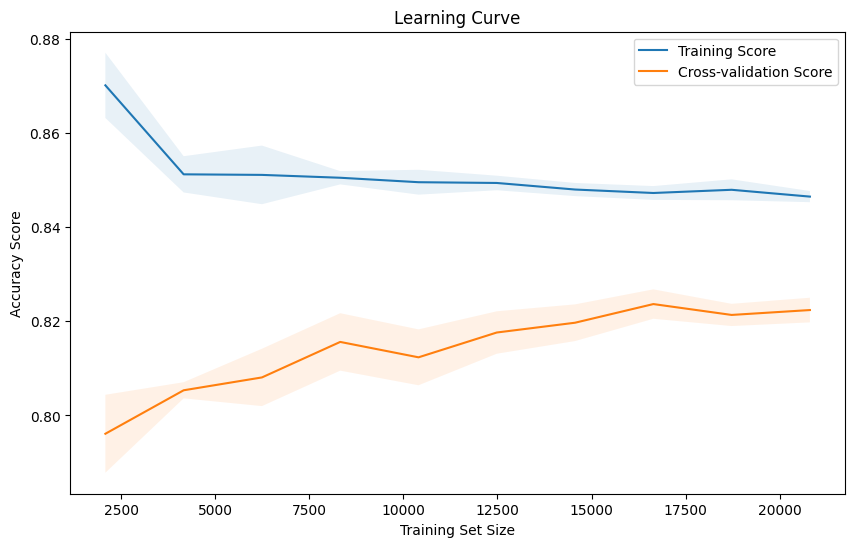

In [58]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    best_dt_model, x_train, y_train, cv=5, train_sizes=np.linspace(0.1,1.0,10), n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-validation Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

Interpretasi :
* jika **kurva training terus naik tapi kurva testing mendatar atau turun**, ini indikasi **overfitting**,
* jika **kedua kurva rendah dan berdekatan**,  ini indikasi **underfitting**

# **Cross Validation Score**

In [59]:
from sklearn.model_selection import cross_val_score

# Hitung cross-validation score
cv_scores = cross_val_score(best_dt_model, x_train, y_train, cv=5)
print('Cross-validation Score : ', cv_scores)
print('Mean Cross-validation Score : ', np.mean(cv_scores))
print('Standard deviation of CV Score :', np.std(cv_scores))

Cross-validation Score :  [0.81910804 0.82580273 0.82234186 0.82003461 0.82426456]
Mean Cross-validation Score :  0.8223103592372478
Standard deviation of CV Score : 0.002508006544471124


Interpretasi :
* jika **Mean CV score jauh lebih rendah dari training accuracy**, ini bisa jadi indikasi **overfitting**,
* jika **standard deviasi CV Score tinggi**, ini bisa menunjukkan model yang tidak stabil, yang juga bisa mengindikasikan **overfittinig**

# **Complexity Curve (Untuk Decision Tree):**

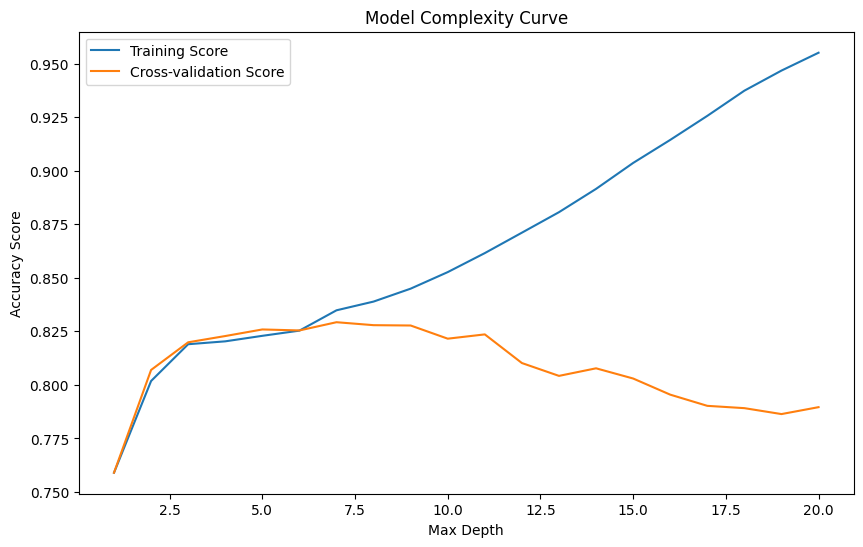

In [60]:
max_depths = range(1,21) #digunakan untuk nilai integer dari 1 - 20
train_scores = []
test_scores = []

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt.fit(x_train, y_train)
    train_scores.append(dt.score(x_train, y_train))
    test_scores.append(dt.score(x_test, y_test))

plt.figure(figsize=(10,6))
plt.plot(max_depths, train_scores, label='Training Score')
plt.plot(max_depths, test_scores, label='Cross-validation Score')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.title('Model Complexity Curve')
plt.legend()
plt.show()

**Interpretasi:**
* Jika kurva training terus naik tapi kurva testing mulai turun setelah titik tertentu, ini indikasi **overfitting**.
* Jika kedua kurva rendah dan berdekatan, ini indikasi **underfitting**.

**Observasi:**
* **Underfitting**: Terlihat di bagian kiri grafik (kedalaman 1-3) dimana kedua skor rendah.
* **Overfitting**: Mulai terjadi setelah kedalaman sekitar 7, dimana garis biru terus naik tapi garis oranye mulai turun.
* **Sweet spot (titik optimal)**: Berada di sekitar kedalaman 5-7, dimana testing score mencapai puncak.

**Kesimpulan:**
* Model dengan **kedalaman sekitar 5-7 mungkin memberikan keseimbangan terbaik** antara bias dan varians.
* Setelah kedalaman 7, model mulai overfitting: performa pada data training terus meningkat, tapi menurun pada data testing.
* Kedalaman pohon di atas 10 menunjukkan overfitting yang signifikan, dengan gap besar antara training dan testing score.

**Rekomendasi:**
* Gunakan **max_depth antara 5-7** untuk model final untuk **menghindari overfitting**.


# **Visualisasi Decission Tree versi Standar dengan max_depth=5**

Gambar pohon keputusan telah disimpan sebagai "decision_tree_visualization.png"


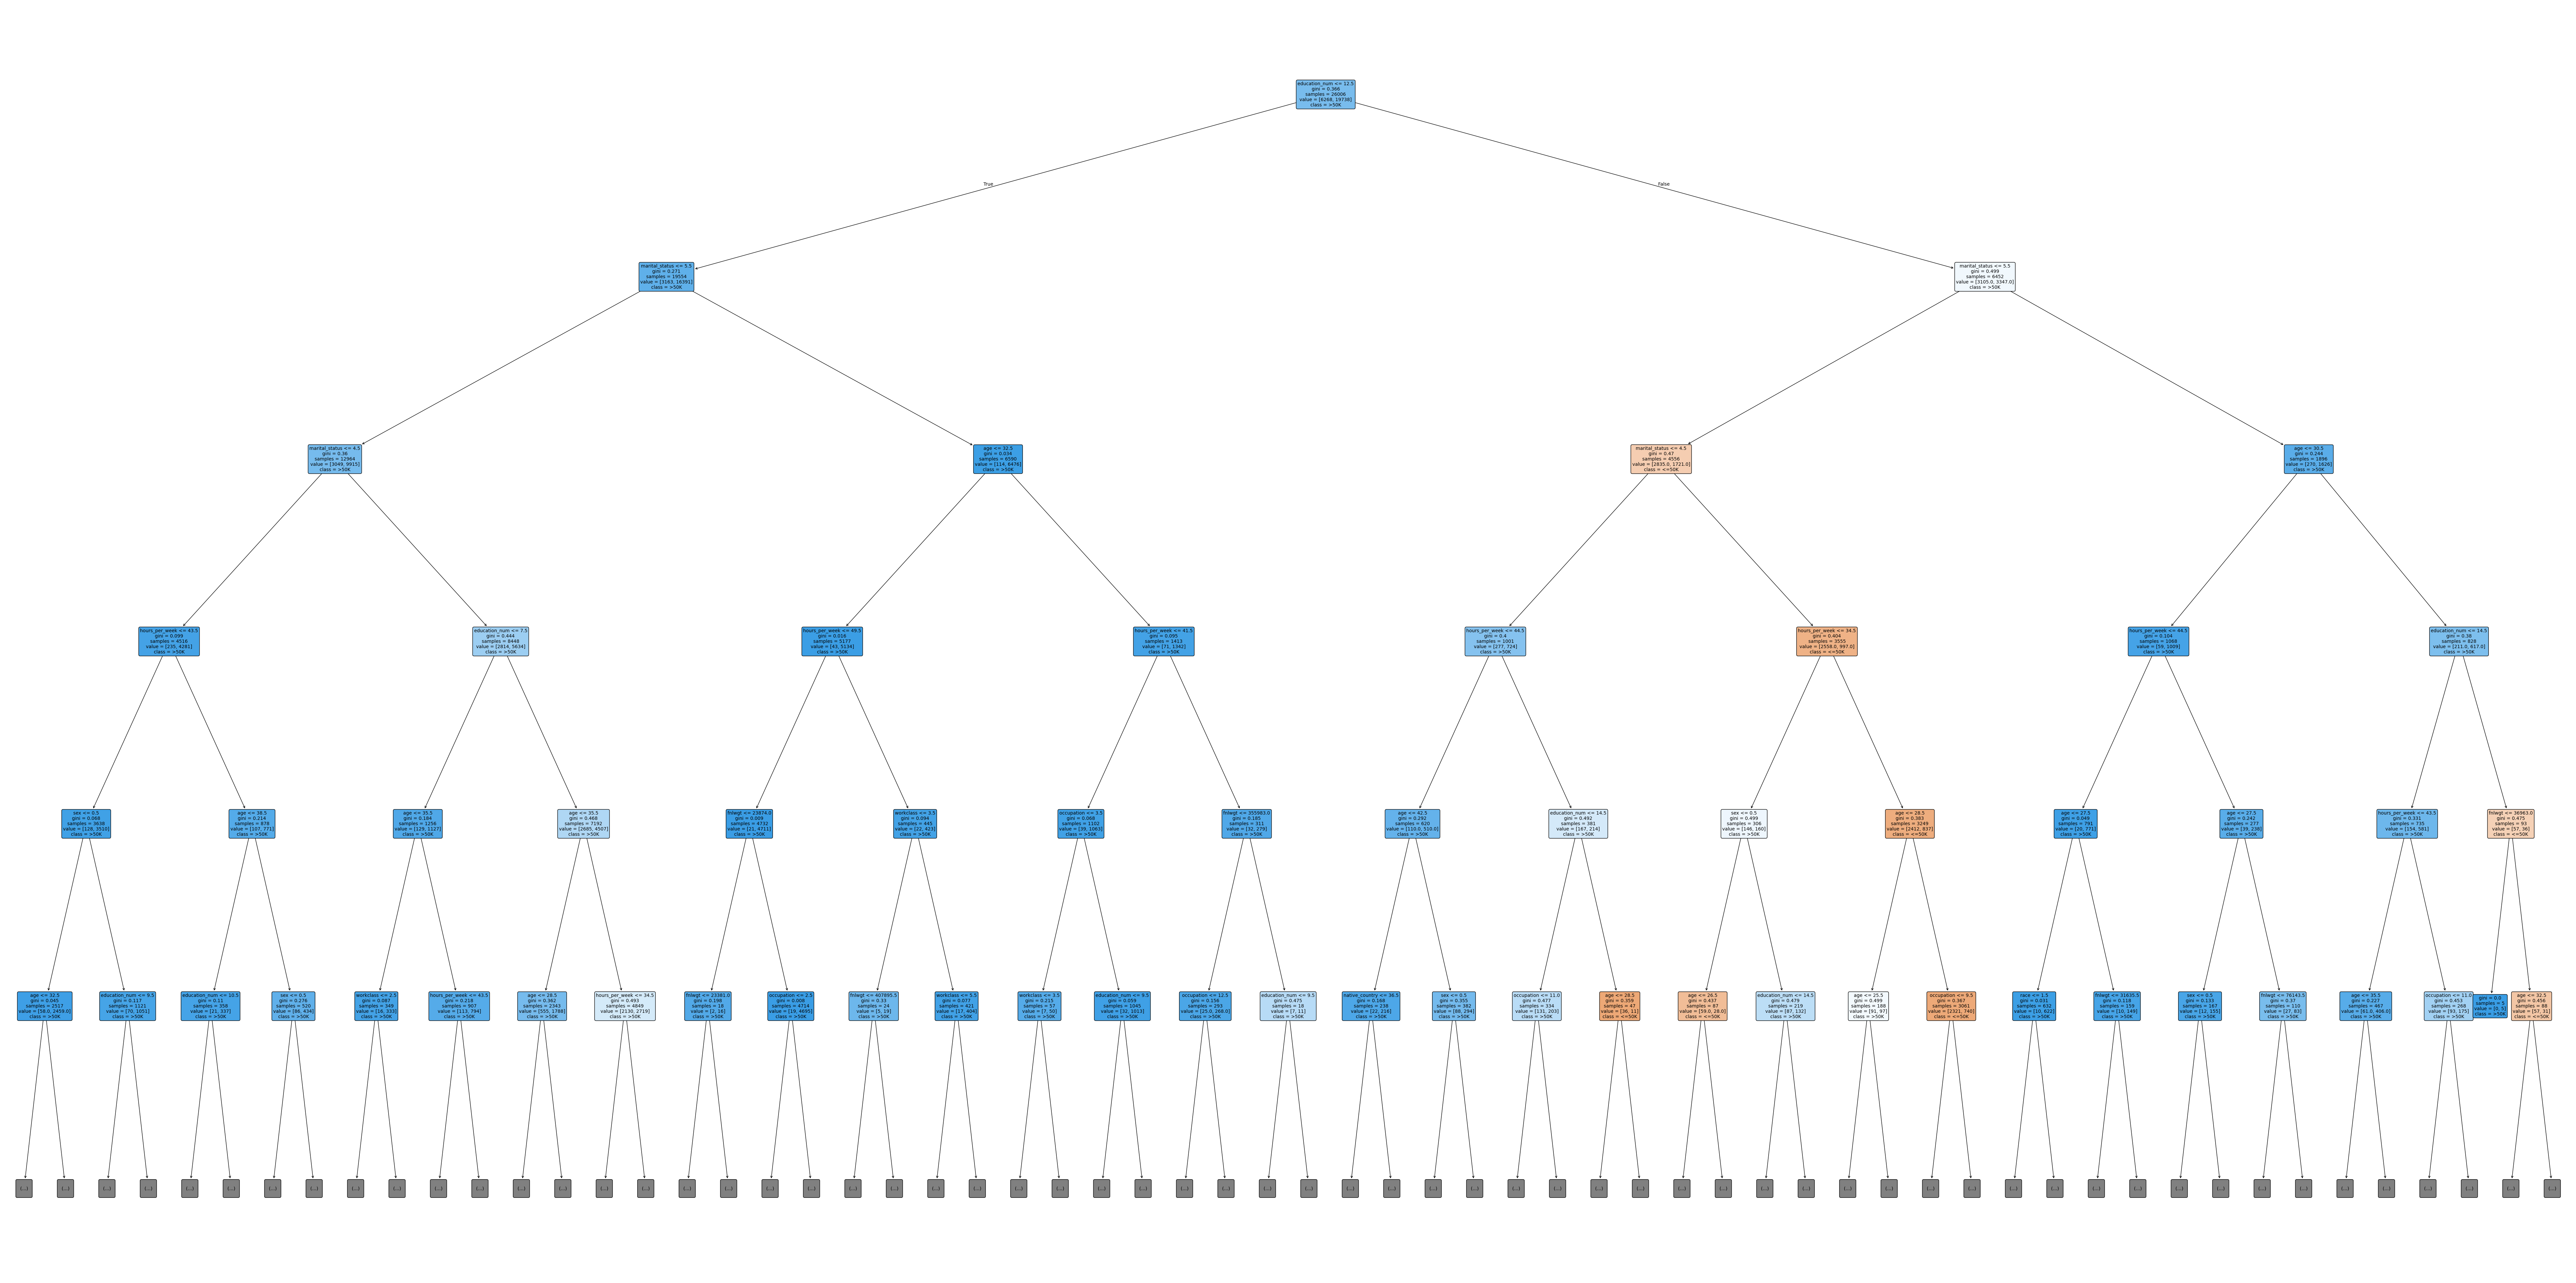

In [61]:
from sklearn.tree import plot_tree

# buat gambar dengan ukuran yang sangat besar - disini maxdepth dibuat 5 agar lebih cepat terbuat
plt.figure(figsize=(100,50))

# plot untuk pohon keputusan
plot_tree(dt_model, feature_names=x.columns, class_names=['<=50K', '>50K'], filled=True, rounded=True, fontsize=10, max_depth=5)

# simpan gambar dengan dpi tinggi
plt.savefig(f'{folder_name}/decision_tree_visualization.png', dpi=300, bbox_inches='tight')

print('Gambar pohon keputusan telah disimpan sebagai "decision_tree_visualization.png"')

# **Visualisasi Decision Tree versi Hyperparameter tanpa max_depth**

In [ ]:
from sklearn.tree import plot_tree

# buat gambar dengan ukuran yang sangat besar - disini maxdepth dibuat 5 agar lebih cepat terbuat
plt.figure(figsize=(100,50))

# plot untuk pohon keputusan
plot_tree(dt_model, feature_names=x.columns, class_names=['<=50K', '>50K'], filled=True, rounded=True, fontsize=10)

# simpan gambar dengan dpi tinggi
plt.savefig(f'{folder_name}/best_decision_tree_visualization.png', dpi=300, bbox_inches='tight')

print('Gambar pohon keputusan telah disimpan sebagai "best_decision_tree_visualization.png"')

# **Visualisasi Decision Tree Versi Hyperparameterr dengan max_depth=5**

In [ ]:
from sklearn.tree import plot_tree

# buat gambar dengan ukuran yang sangat besar - disini maxdepth dibuat 5 agar lebih cepat terbuat
plt.figure(figsize=(100,50))

# plot untuk pohon keputusan
plot_tree(best_dt_model, feature_names=x.columns, class_names=['<=50K', '>50K'], filled=True, rounded=True, fontsize=10, max_depth=5)

# simpan gambar dengan dpi tinggi
plt.savefig(f'{folder_name}/decision_tree_visualization_5.png', dpi=300, bbox_inches='tight')

print('Gambar pohon keputusan telah disimpan sebagai "decision_tree_visualization_5.png"')